<h1 style="color:#1a8cff;"><center>Bike Sharing Assignment</center></h1>

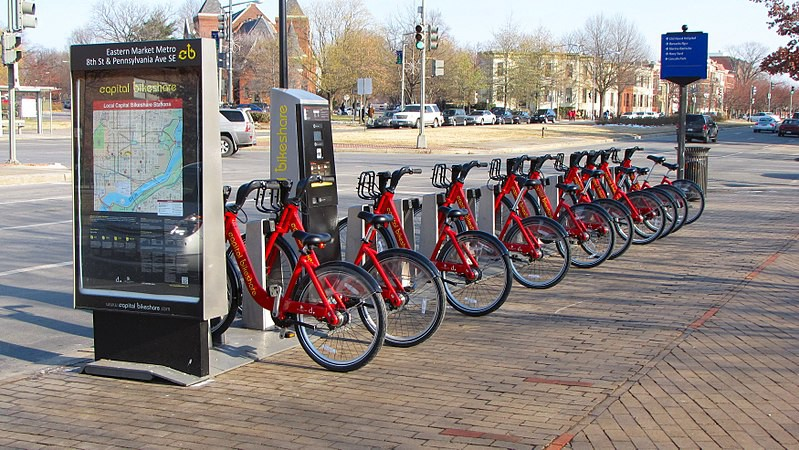

### Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands



## Step 1: Reading and Understanding the Data

Import the relevant libraries and IGNORE the warnings

In [1556]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [1557]:
bikesharing = pd.read_csv('day.csv')

In [1558]:
# Check the head of the dataset
bikesharing.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [1559]:
# Inspect the various aspects of the bikesharing dataframe
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Comment:
**bikesharing** dataframe contains __16 features__ and __730 records__
- **4** features are *float64*, **10** features are *integer*, and **1** feature is *object* datatype respectively
- There are no missing values in the dataset

In [1560]:
bikesharing.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

## Step 2: Visualising the Data
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Also, we'll try to identify if some predictors directly have a strong association with the outcome variable

#### Visualising Numeric Variables

Pairplot of all the numeric variables

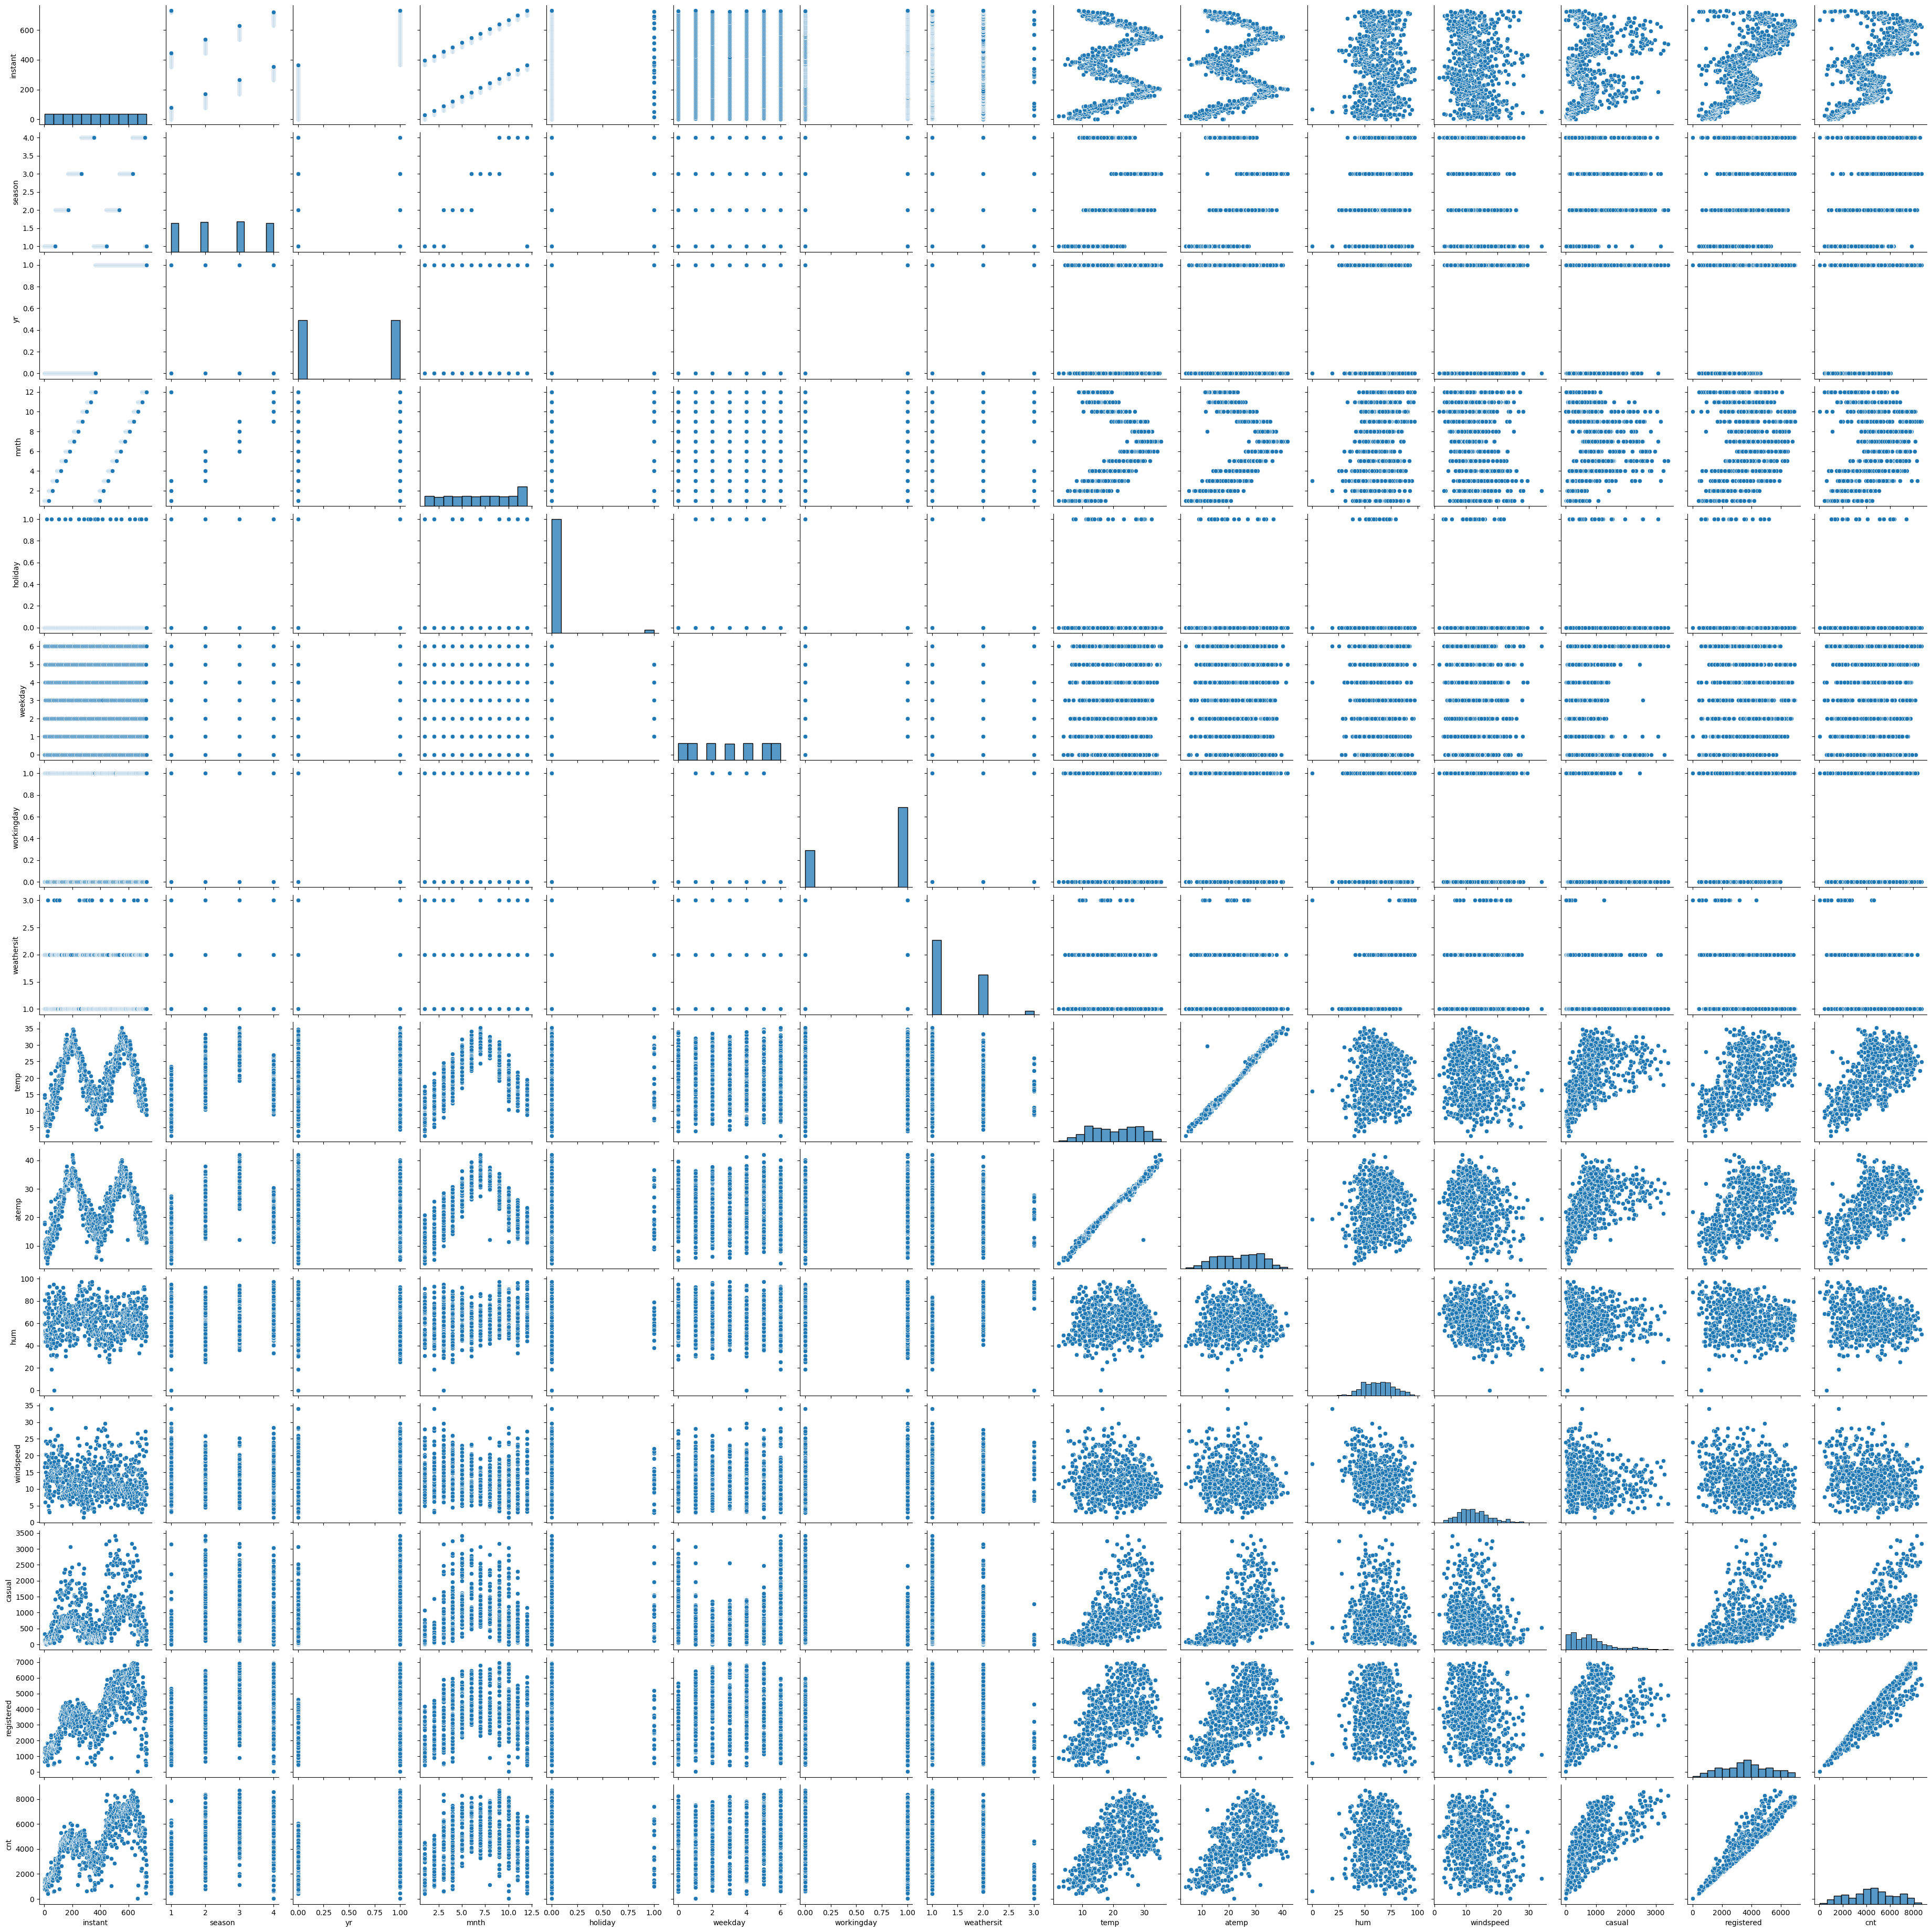

In [1561]:
sns.pairplot(bikesharing)
plt.show()

#### Visualising Categorical Variables

We can see that there are few categorical variables viz., _season_, _yr_, _mnth_, _weekday_, _workingday_, _weathersit_ etc. Let's make a boxplot for some of these variables.

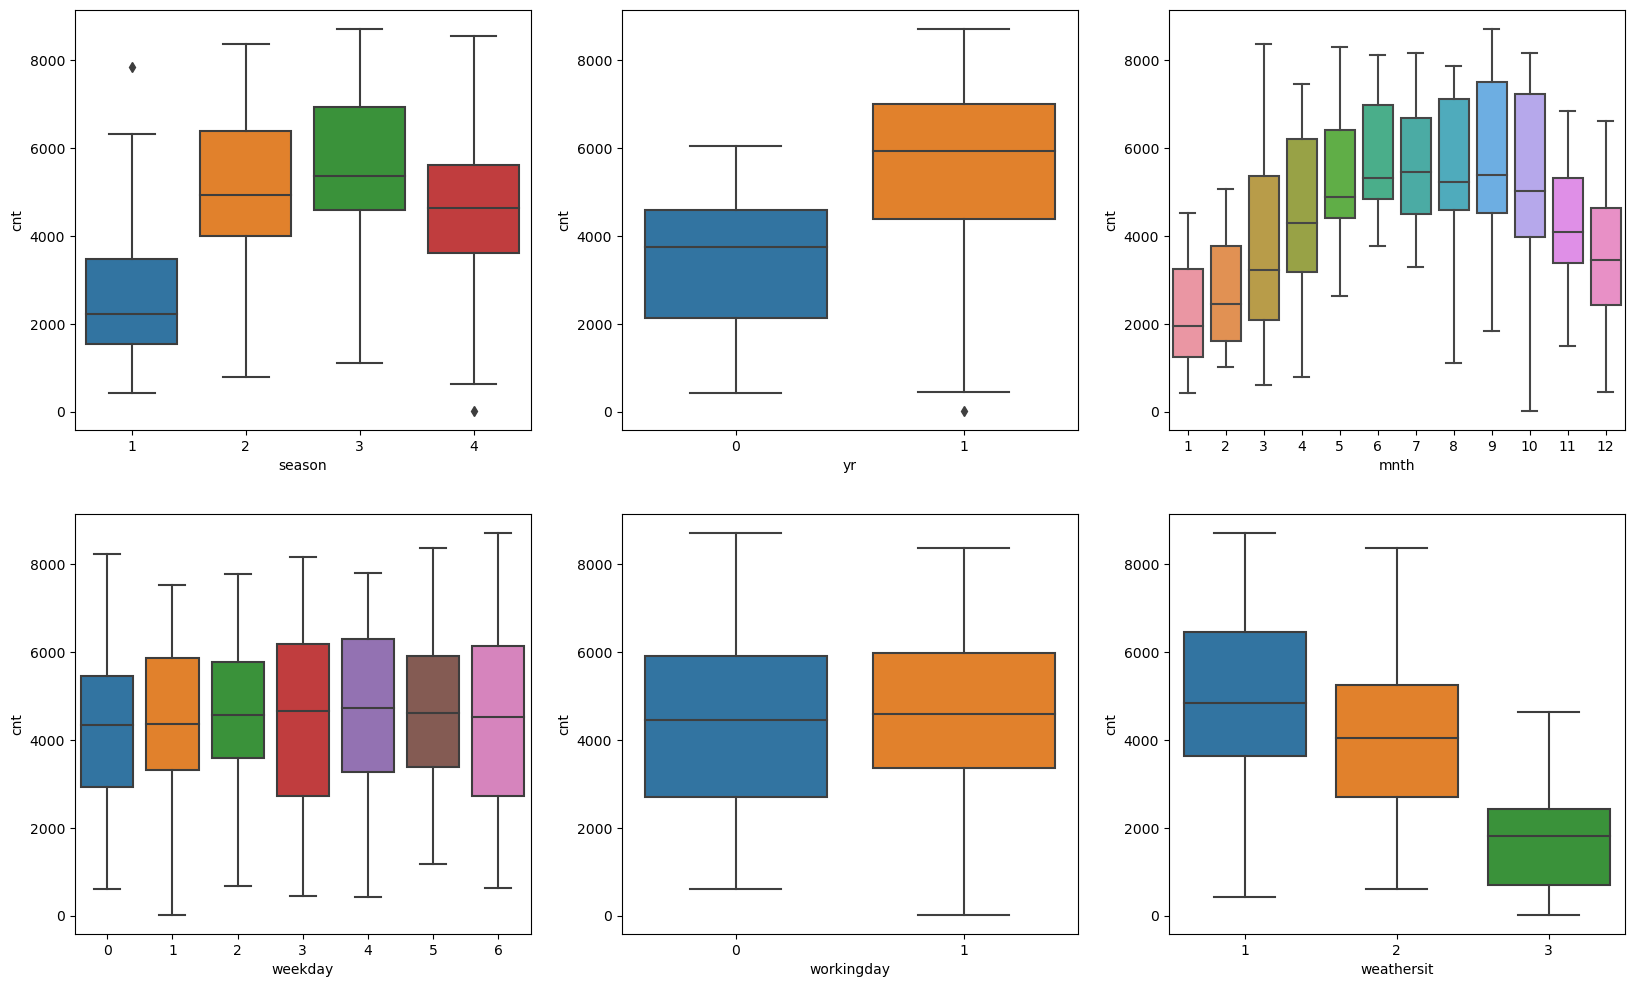

In [1562]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikesharing)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharing)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharing)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing)
plt.show()

#### Comment: 
Bike rentals are high: 
- during working days compared to non-working days
- when the weather is clear followed by cloudy and light rain
- in the month of September & October
- in the season of fall

## Step 3: Data Cleaning, Conversion and Exploration

### 3.1 Data Cleaning
#### Dropping the following columns that are not useful for analysis
- _instant_ is just a row instance identifier.
- _dteday_ can be removed as we have year(yr), month(mnth) and weekday columns
- _casual_ and _registered_ features are not much useful as we have one more feature, __cnt__ which is a total of rental bikes including these two

In [1563]:
bikesharing.drop(['instant','dteday', 'casual', 'registered'], axis=1, inplace = True)
print(bikesharing.shape)
bikesharing.head()

(730, 12)


season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

### 3.2 Data Conversion
#### Replacing 
- _season_
- _yr_
- _mnth_ 
- _weekday_
- _weathersit_ </br>
values with meaningful and readable text

In [1564]:
# Season
bikesharing.season.replace({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"}, inplace = True)

# Year
bikesharing.yr.replace({0:2018, 1:2019}, inplace = True)

# Month
bikesharing.mnth.replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 
                          8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace = True)

# Week Day
bikesharing.weekday.replace({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}, inplace = True)

# Weather Situation
bikesharing.weathersit.replace({1:'Clear', 2:'Cloudy', 3:'Light Rain', 4:'Heavy Rain'}, inplace = True)

bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [1565]:
# Check the new values
bikesharing.head()

season    yr mnth  holiday weekday  workingday weathersit       temp  \
0  Spring  2018  Jan        0     Sat           0     Cloudy  14.110847   
1  Spring  2018  Jan        0     Sun           0     Cloudy  14.902598   
2  Spring  2018  Jan        0     Mon           1      Clear   8.050924   
3  Spring  2018  Jan        0     Tue           1      Clear   8.200000   
4  Spring  2018  Jan        0     Wed           1      Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

### 3.3 EDA

#### Visualising Numeric Variables

Pairplot of all the numeric variables

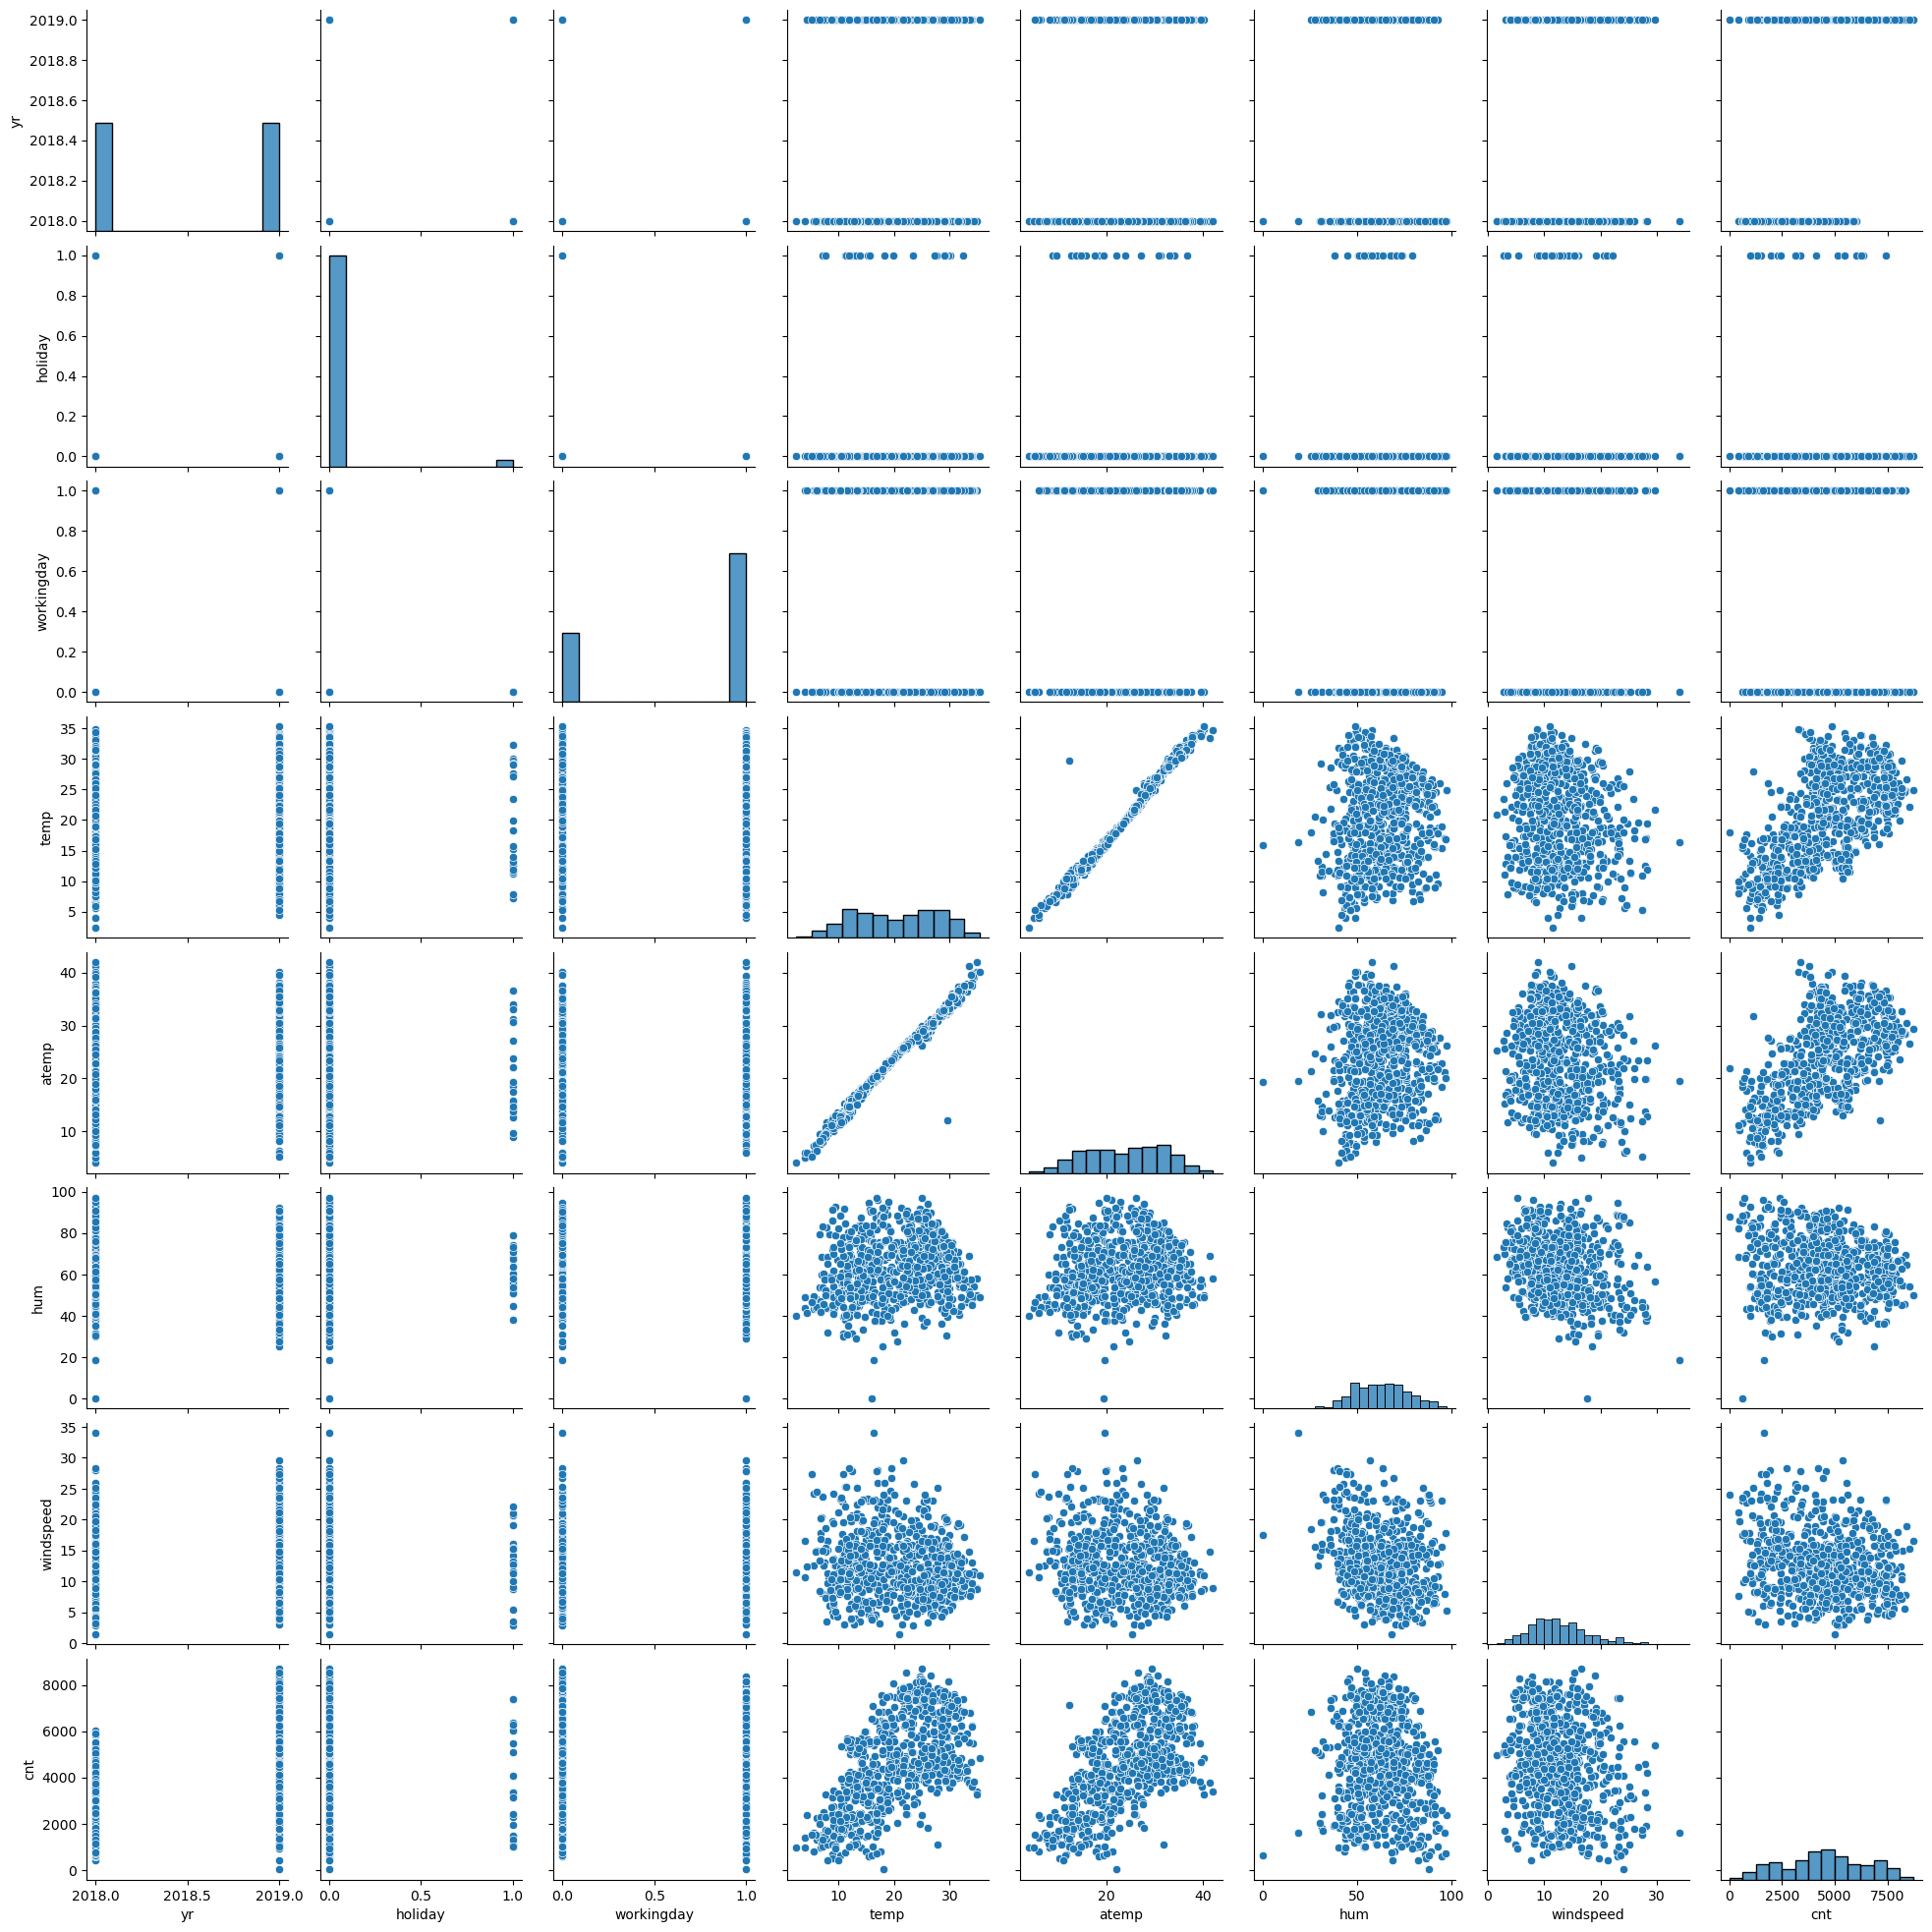

In [1566]:
sns.pairplot(bikesharing)
plt.show()

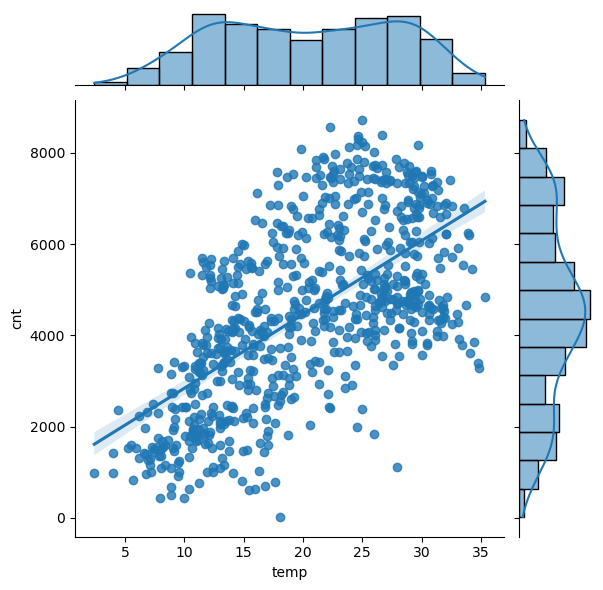

In [1567]:
# Jointplot to check the trend of temp v/s cnt
sns.jointplot(data=bikesharing, x='temp', y='cnt', kind="reg")
plt.show()

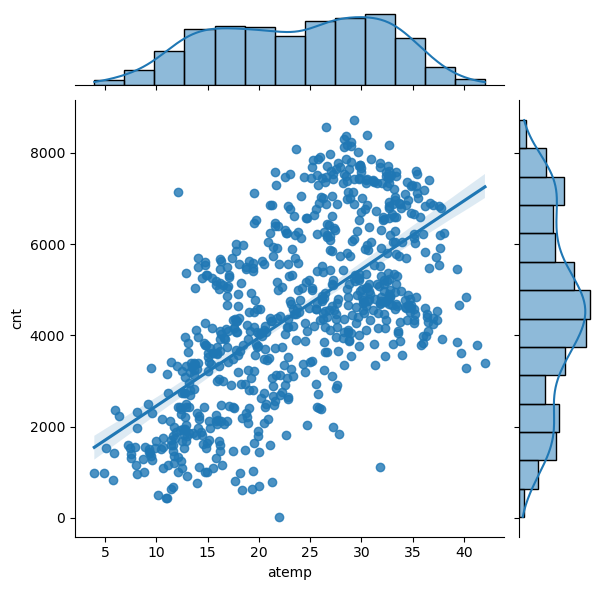

In [1568]:
# Jointplot to check the trend of atemp v/s cnt
sns.jointplot(data=bikesharing, x='atemp', y='cnt', kind="reg")
plt.show()

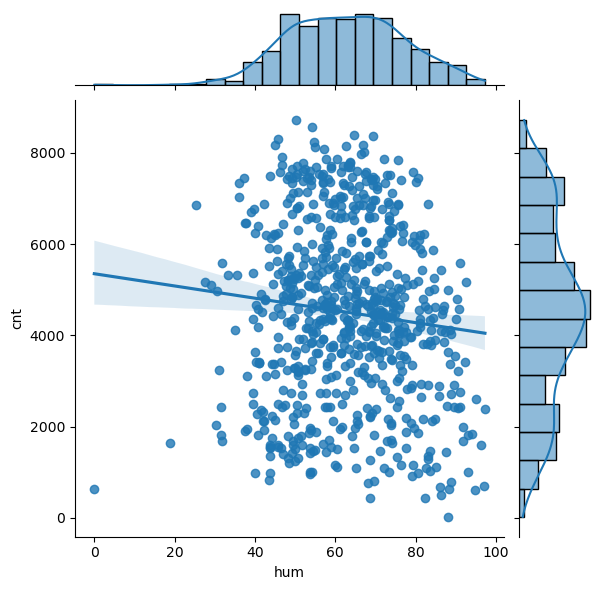

In [1569]:
# Jointplot to check the trend of humidity v/s cnt
sns.jointplot(data=bikesharing, x='hum', y='cnt', kind="reg")
plt.show()

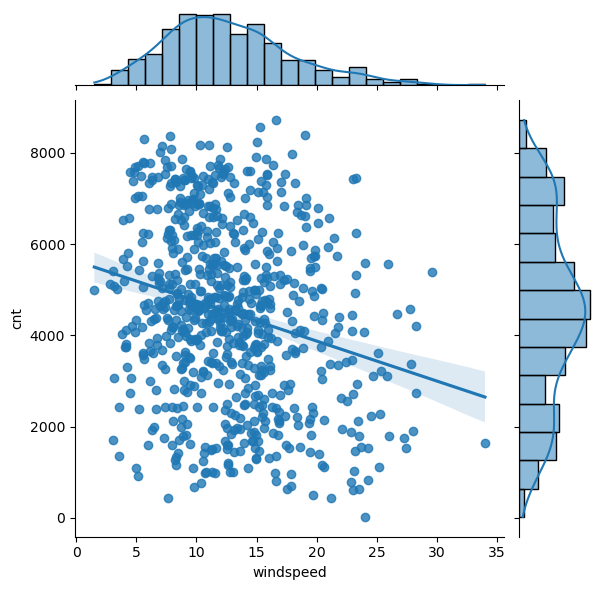

In [1570]:
# Jointplot to check the trend of windspeed v/s cnt
sns.jointplot(data=bikesharing, x='windspeed', y='cnt', kind="reg")
plt.show()

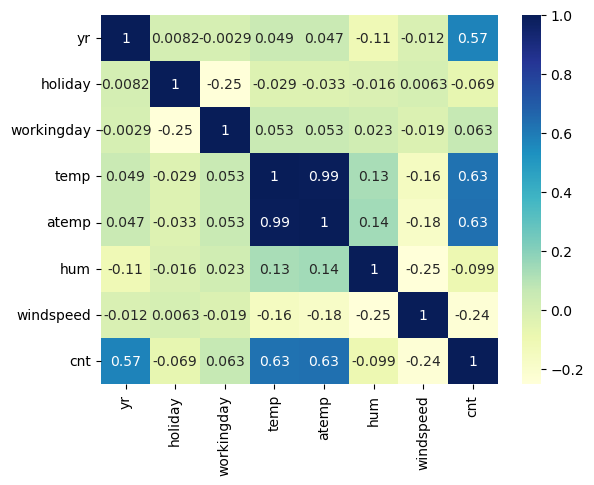

In [1571]:
# Heatmap to check the correlation of numeric variables
sns.heatmap(bikesharing.corr(), annot = True, cmap = "YlGnBu")
plt.show()

#### Comment: 
- Cnt has a linear relationship with _temp_ & _atemp_ 
- temp and atemp are highly correlated with each other, so, we can drop any one of them

In [1572]:
# Dropping atemp column
bikesharing.drop(['atemp'], axis = 1,inplace=True)
bikesharing.head()

season    yr mnth  holiday weekday  workingday weathersit       temp  \
0  Spring  2018  Jan        0     Sat           0     Cloudy  14.110847   
1  Spring  2018  Jan        0     Sun           0     Cloudy  14.902598   
2  Spring  2018  Jan        0     Mon           1      Clear   8.050924   
3  Spring  2018  Jan        0     Tue           1      Clear   8.200000   
4  Spring  2018  Jan        0     Wed           1      Clear   9.305237   

       hum  windspeed   cnt  
0  80.5833  10.749882   985  
1  69.6087  16.652113   801  
2  43.7273  16.636703  1349  
3  59.0435  10.739832  1562  
4  43.6957  12.522300  1600

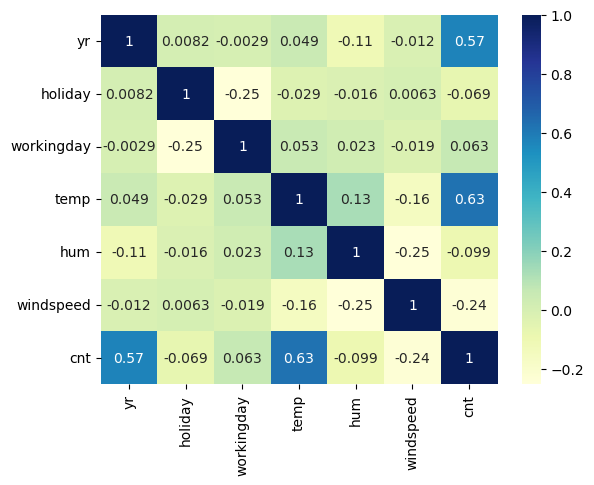

In [1573]:
# Replot the heatmap to check the correlation of numeric variables
sns.heatmap(bikesharing.corr(), annot = True, cmap = "YlGnBu")
plt.show()

#### Comment: 
- Cnt has a good correlation and hence a linear relationship with _temp_

#### Visualising Categorical Variables

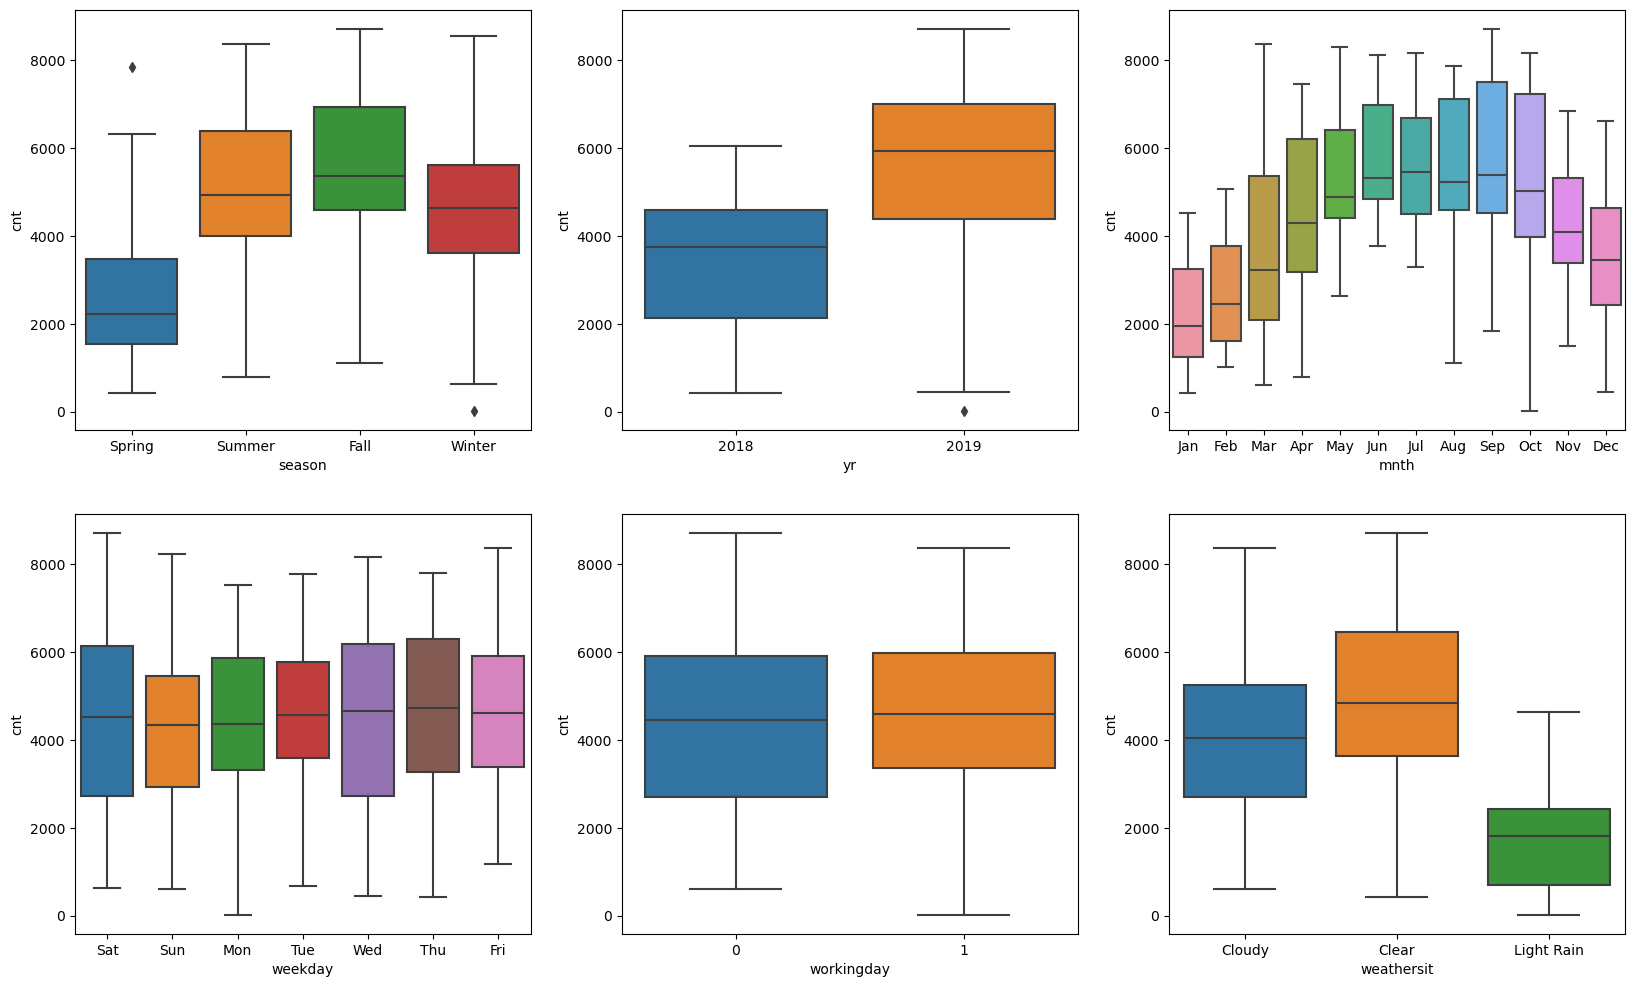

In [1574]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikesharing)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharing)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharing)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing)
plt.show()

Lets visualise some of these categorical features parallely by using the `hue` argument. 

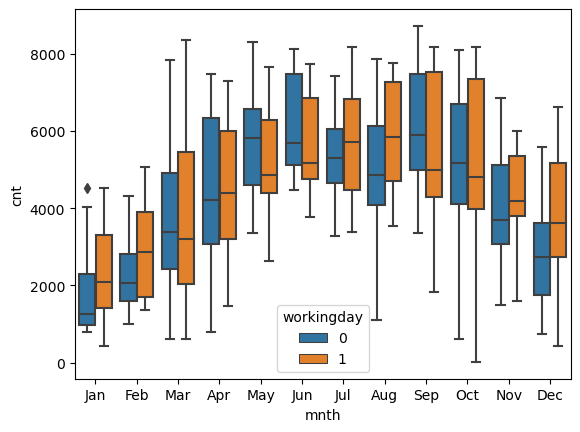

In [1575]:
# Below is the plot for `month` with `workingday` as hue
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'workingday', data = bikesharing)
plt.show()

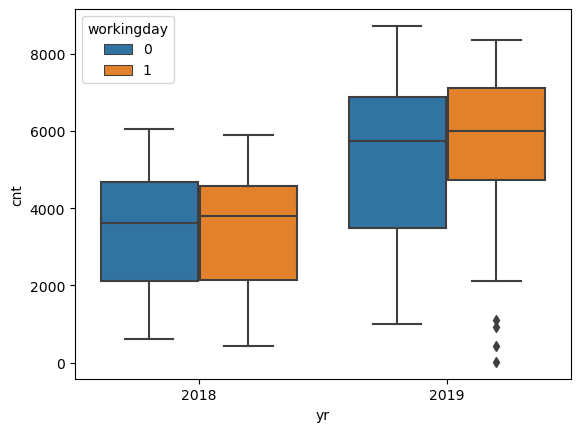

In [1576]:
# Below is the plot for `year` with `workingday` as hue
sns.boxplot(x = 'yr', y = 'cnt', hue = 'workingday', data = bikesharing)
plt.show()

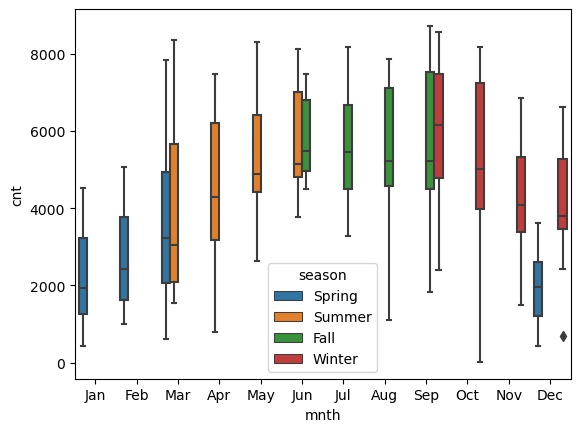

In [1577]:
# Below is the plot for `month` with `season` as hue
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'season', data = bikesharing)
plt.show()

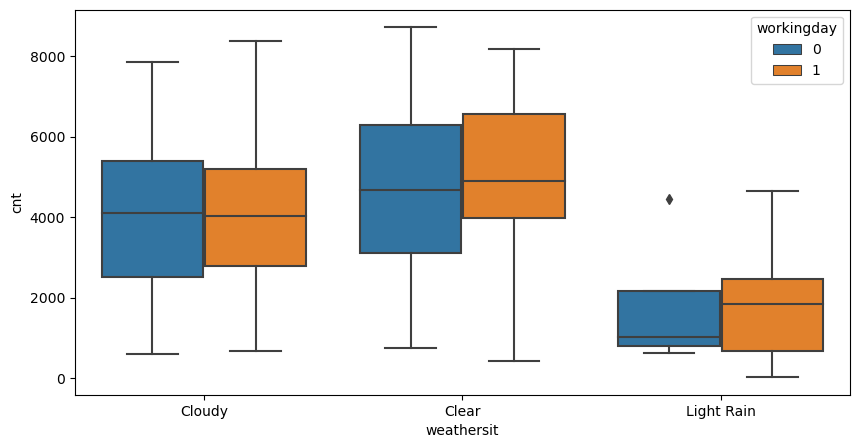

In [1578]:
# Below is the plot for `weathersit` with `workingday` as the hue
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'workingday', data = bikesharing)
plt.show()

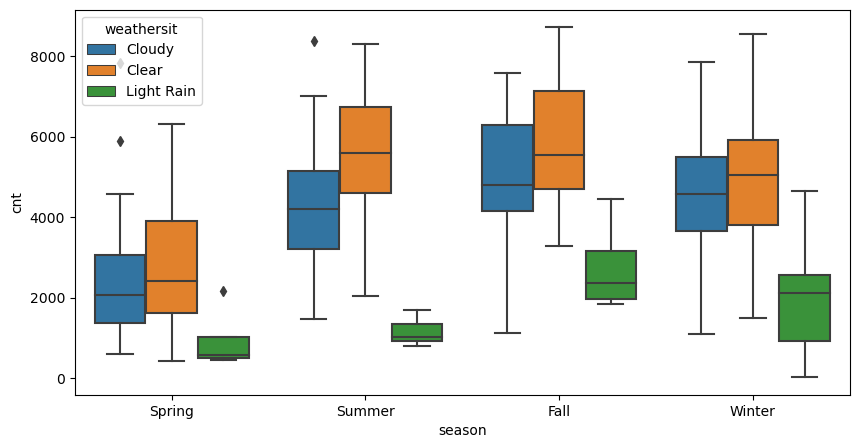

In [1579]:
# Below is the plot for `season` with `weathersit` as the hue
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = bikesharing)
plt.show()

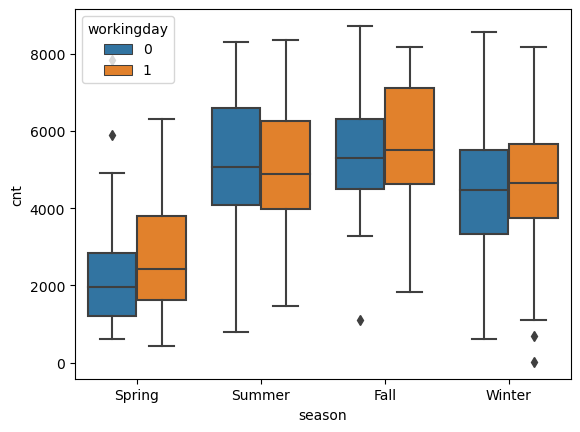

In [1580]:
# Below is the plot for `season` with `workingday` as hue
sns.boxplot(x = 'season', y = 'cnt', hue = 'workingday', data = bikesharing)
plt.show()

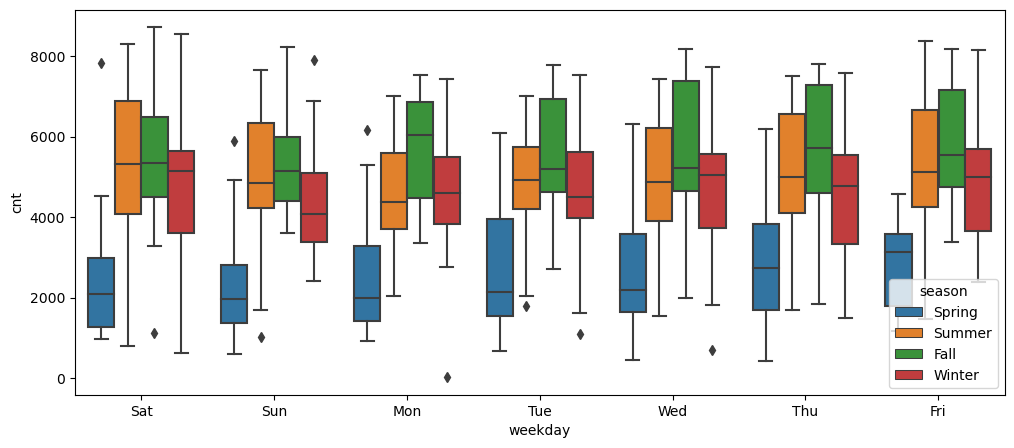

In [1581]:
# Below is the plot for `weekday` with `season` as the hue
plt.figure(figsize = (12, 5))
sns.boxplot(x = 'weekday', y = 'cnt', hue = 'season', data = bikesharing)
plt.show()

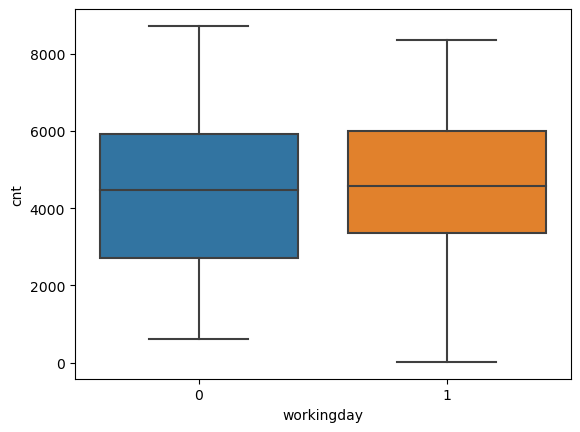

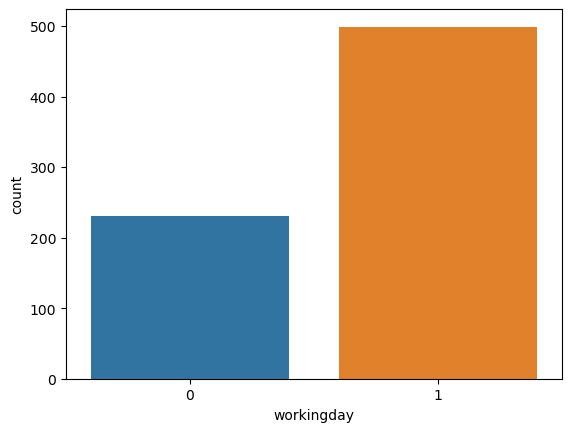

In [1582]:
# Below is the plot for `workingday` with `cnt`
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharing)
plt.show()

sns.countplot(data = bikesharing, x = 'workingday')
plt.show()

#### Comment: 
Bike rentals are high: 
- during working days compared to non-working days
- when the weather is clear followed by cloudy and light rain
- in the month of September & October
- in the season of fall

The demand for bike rentals is increasing year-on-year

## Step 4: Data Preparation

#### Data Encoding: 
There are few categorical variables viz., `month`, `weekday`, `season` and `weathersit` which has multiple levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [1583]:
# Month
bikesharing = pd.get_dummies(bikesharing, columns = ['mnth'], drop_first = True)
bikesharing.head()

season    yr  holiday weekday  workingday weathersit       temp      hum  \
0  Spring  2018        0     Sat           0     Cloudy  14.110847  80.5833   
1  Spring  2018        0     Sun           0     Cloudy  14.902598  69.6087   
2  Spring  2018        0     Mon           1      Clear   8.050924  43.7273   
3  Spring  2018        0     Tue           1      Clear   8.200000  59.0435   
4  Spring  2018        0     Wed           1      Clear   9.305237  43.6957   

   windspeed   cnt  ...  mnth_Dec  mnth_Feb  mnth_Jan  mnth_Jul  mnth_Jun  \
0  10.749882   985  ...         0         0         1         0         0   
1  16.652113   801  ...         0         0         1         0         0   
2  16.636703  1349  ...         0         0         1         0         0   
3  10.739832  1562  ...         0         0         1         0         0   
4  12.522300  1600  ...         0         0         1         0         0   

   mnth_Mar  mnth_May  mnth_Nov  mnth_Oct  mnth_Sep  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 21 columns]

In [1584]:
# Weekday
bikesharing = pd.get_dummies(bikesharing, columns = ['weekday'], drop_first = True)
bikesharing.head()

season    yr  holiday  workingday weathersit       temp      hum  \
0  Spring  2018        0           0     Cloudy  14.110847  80.5833   
1  Spring  2018        0           0     Cloudy  14.902598  69.6087   
2  Spring  2018        0           1      Clear   8.050924  43.7273   
3  Spring  2018        0           1      Clear   8.200000  59.0435   
4  Spring  2018        0           1      Clear   9.305237  43.6957   

   windspeed   cnt  mnth_Aug  ...  mnth_May  mnth_Nov  mnth_Oct  mnth_Sep  \
0  10.749882   985         0  ...         0         0         0         0   
1  16.652113   801         0  ...         0         0         0         0   
2  16.636703  1349         0  ...         0         0         0         0   
3  10.739832  1562         0  ...         0         0         0         0   
4  12.522300  1600         0  ...         0         0         0         0   

   weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  \
0            0            1            0            0            0   
1            0            0            1            0            0   
2            1            0            0            0            0   
3            0            0            0            0            1   
4            0            0            0            0            0   

   weekday_Wed  
0            0  
1            0  
2            0  
3            0  
4            1  

[5 rows x 26 columns]

In [1585]:
# Season
bikesharing = pd.get_dummies(bikesharing, columns = ['season'], drop_first = True)
bikesharing.head()

yr  holiday  workingday weathersit       temp      hum  windspeed   cnt  \
0  2018        0           0     Cloudy  14.110847  80.5833  10.749882   985   
1  2018        0           0     Cloudy  14.902598  69.6087  16.652113   801   
2  2018        0           1      Clear   8.050924  43.7273  16.636703  1349   
3  2018        0           1      Clear   8.200000  59.0435  10.739832  1562   
4  2018        0           1      Clear   9.305237  43.6957  12.522300  1600   

   mnth_Aug  mnth_Dec  ...  mnth_Sep  weekday_Mon  weekday_Sat  weekday_Sun  \
0         0         0  ...         0            0            1            0   
1         0         0  ...         0            0            0            1   
2         0         0  ...         0            1            0            0   
3         0         0  ...         0            0            0            0   
4         0         0  ...         0            0            0            0   

   weekday_Thu  weekday_Tue  weekday_Wed  season_Spring  season_Summer  \
0            0            0            0              1              0   
1            0            0            0              1              0   
2            0            0            0              1              0   
3            0            1            0              1              0   
4            0            0            1              1              0   

   season_Winter  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 28 columns]

In [1586]:
# Weather Situation
bikesharing = pd.get_dummies(bikesharing, columns = ['weathersit'], drop_first = True)
bikesharing.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  mnth_Aug  \
0  2018        0           0  14.110847  80.5833  10.749882   985         0   
1  2018        0           0  14.902598  69.6087  16.652113   801         0   
2  2018        0           1   8.050924  43.7273  16.636703  1349         0   
3  2018        0           1   8.200000  59.0435  10.739832  1562         0   
4  2018        0           1   9.305237  43.6957  12.522300  1600         0   

   mnth_Dec  mnth_Feb  ...  weekday_Sat  weekday_Sun  weekday_Thu  \
0         0         0  ...            1            0            0   
1         0         0  ...            0            1            0   
2         0         0  ...            0            0            0   
3         0         0  ...            0            0            0   
4         0         0  ...            0            0            0   

   weekday_Tue  weekday_Wed  season_Spring  season_Summer  season_Winter  \
0            0            0              1              0              0   
1            0            0              1              0              0   
2            0            0              1              0              0   
3            1            0              1              0              0   
4            0            1              1              0              0   

   weathersit_Cloudy  weathersit_Light Rain  
0                  1                      0  
1                  1                      0  
2                  0                      0  
3                  0                      0  
4                  0                      0  

[5 rows x 29 columns]

In [1587]:
# Convert the column Year to integer and replace it with the original values 0 & 1
bikesharing.yr.replace({2018:0, 2019:1}, inplace = True)

In [1588]:
print(bikesharing.shape)
bikesharing.info()

(730, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   hum                    730 non-null    float64
 5   windspeed              730 non-null    float64
 6   cnt                    730 non-null    int64  
 7   mnth_Aug               730 non-null    uint8  
 8   mnth_Dec               730 non-null    uint8  
 9   mnth_Feb               730 non-null    uint8  
 10  mnth_Jan               730 non-null    uint8  
 11  mnth_Jul               730 non-null    uint8  
 12  mnth_Jun               730 non-null    uint8  
 13  mnth_Mar               730 non-null    uint8  
 14  mnth_May               730 non-null    uint8  
 

## Step 5: Model building

### 5.1 Splitting the Data into Training and Testing Sets

In [1589]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(bikesharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1590]:
print("Training data ->", df_train.shape)
print("Testing data ->", df_test.shape)

Training data -> (510, 29)
Testing data -> (219, 29)


### 5.2 Feature Scaling

In [1591]:
from sklearn.preprocessing import MinMaxScaler

# Using Normalized scaler to scale
scaler = MinMaxScaler()

# Apply scaler() to numeric fields except the 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

# Fit and Transform training set only
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [1592]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     510 non-null    int64  
 1   holiday                510 non-null    int64  
 2   workingday             510 non-null    int64  
 3   temp                   510 non-null    float64
 4   hum                    510 non-null    float64
 5   windspeed              510 non-null    float64
 6   cnt                    510 non-null    float64
 7   mnth_Aug               510 non-null    uint8  
 8   mnth_Dec               510 non-null    uint8  
 9   mnth_Feb               510 non-null    uint8  
 10  mnth_Jan               510 non-null    uint8  
 11  mnth_Jul               510 non-null    uint8  
 12  mnth_Jun               510 non-null    uint8  
 13  mnth_Mar               510 non-null    uint8  
 14  mnth_May               510 non-null    uint8  
 15  mnth_

In [1593]:
df_train.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  \
653   1        0           1  0.509887  0.575354   0.300794  0.864243   
576   1        0           1  0.815169  0.725633   0.264686  0.827658   
426   1        0           0  0.442393  0.640189   0.255342  0.465255   
728   1        0           0  0.245101  0.498067   0.663106  0.204096   
482   1        0           0  0.395666  0.504508   0.188475  0.482973   

     mnth_Aug  mnth_Dec  mnth_Feb  ...  weekday_Sat  weekday_Sun  weekday_Thu  \
653         0         0         0  ...            0            0            0   
576         0         0         0  ...            0            0            0   
426         0         0         0  ...            1            0            0   
728         0         1         0  ...            0            1            0   
482         0         0         0  ...            1            0            0   

     weekday_Tue  weekday_Wed  season_Spring  season_Summer  season_Winter  \
653            1            0              0              0              1   
576            1            0              0              0              0   
426            0            0              1              0              0   
728            0            0              1              0              0   
482            0            0              0              1              0   

     weathersit_Cloudy  weathersit_Light Rain  
653                  0                      0  
576                  0                      0  
426                  1                      0  
728                  0                      0  
482                  1                      0  

[5 rows x 29 columns]

In [1594]:
# Inspect the stats of training set
df_train.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537262    0.650369    0.320768   
std      0.500429    0.157763    0.468282    0.225844    0.145882    0.169797   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.538643    0.199179   
50%      1.000000    0.000000    1.000000    0.540519    0.653714    0.296763   
75%      1.000000    0.000000    1.000000    0.735215    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt    mnth_Aug    mnth_Dec    mnth_Feb  ...  weekday_Sat  \
count  510.000000  510.000000  510.000000  510.000000  ...   510.000000   
mean     0.513620    0.096078    0.084314    0.066667  ...     0.154902   
std      0.224593    0.294988    0.278131    0.249689  ...     0.362166   
min      0.000000    0.000000    0.000000    0.000000  ...     0.000000   
25%      0.356420    0.000000    0.000000    0.000000  ...     0.000000   
50%      0.518638    0.000000    0.000000    0.000000  ...     0.000000   
75%      0.684710    0.000000    0.000000    0.000000  ...     0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...     1.000000   

       weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  season_Spring  \
count   510.000000   510.000000   510.000000   510.000000     510.000000   
mean      0.143137     0.133333     0.131373     0.158824       0.243137   
std       0.350557     0.340268     0.338139     0.365870       0.429398   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       0.000000     0.000000     0.000000     0.000000       0.000000   
50%       0.000000     0.000000     0.000000     0.000000       0.000000   
75%       0.000000     0.000000     0.000000     0.000000       0.000000   
max       1.000000     1.000000     1.000000     1.000000       1.000000   

       season_Summer  season_Winter  weathersit_Cloudy  weathersit_Light Rain  
count     510.000000      510.00000         510.000000             510.000000  
mean        0.245098        0.24902           0.343137               0.029412  
std         0.430568        0.43287           0.475223               0.169124  
min         0.000000        0.00000           0.000000               0.000000  
25%         0.000000        0.00000           0.000000               0.000000  
50%         0.000000        0.00000           0.000000               0.000000  
75%         0.000000        0.00000           1.000000               0.000000  
max         1.000000        1.00000           1.000000               1.000000  

[8 rows x 29 columns]

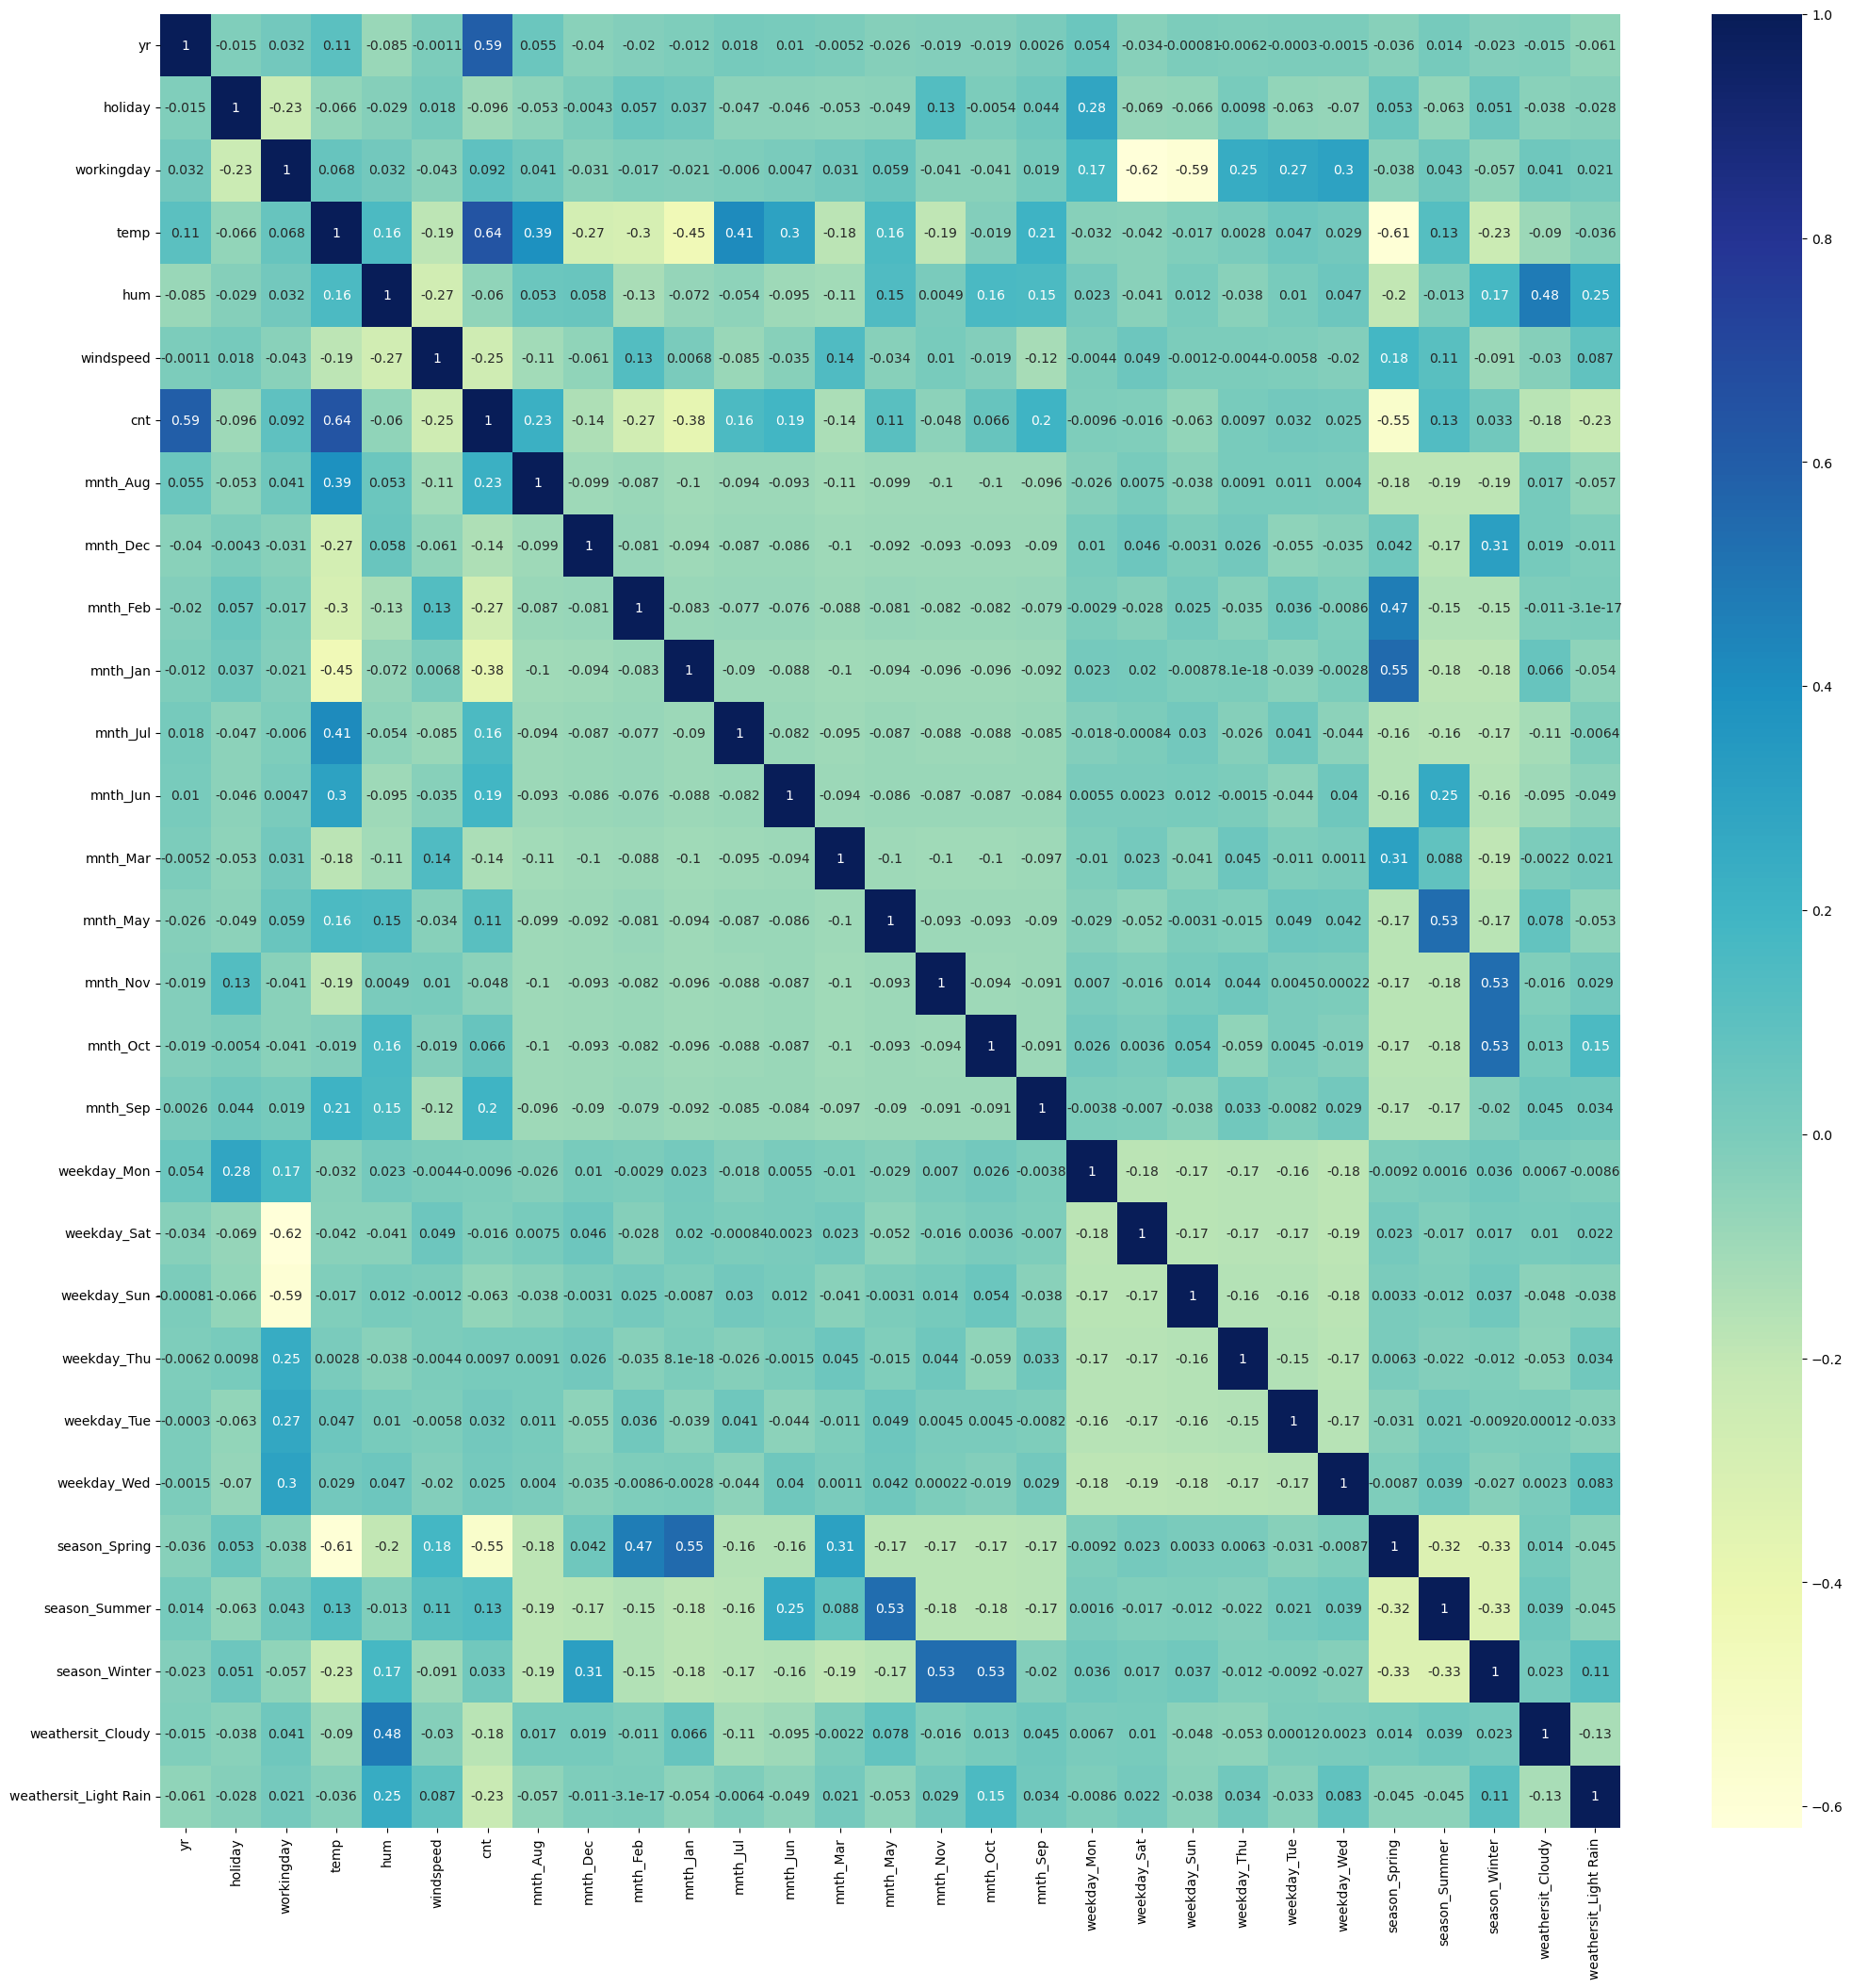

In [1595]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True, cmap = "YlGnBu")
plt.show()

#### Comment: 
Target variable, cnt is highly correlated with temperature & year

### 5.3 Model building using Recursive Feature Elimination (RFE)

In [1596]:
# Dividing training dataset into X and y sets for the model building
y_train = df_train.pop('cnt')
X_train = df_train

In [1597]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [1598]:
X_train.head()

yr  holiday  workingday      temp       hum  windspeed  mnth_Aug  \
653   1        0           1  0.509887  0.575354   0.300794         0   
576   1        0           1  0.815169  0.725633   0.264686         0   
426   1        0           0  0.442393  0.640189   0.255342         0   
728   1        0           0  0.245101  0.498067   0.663106         0   
482   1        0           0  0.395666  0.504508   0.188475         0   

     mnth_Dec  mnth_Feb  mnth_Jan  ...  weekday_Sat  weekday_Sun  weekday_Thu  \
653         0         0         0  ...            0            0            0   
576         0         0         0  ...            0            0            0   
426         0         0         0  ...            1            0            0   
728         1         0         0  ...            0            1            0   
482         0         0         0  ...            1            0            0   

     weekday_Tue  weekday_Wed  season_Spring  season_Summer  season_Winter  \
653            1            0              0              0              1   
576            1            0              0              0              0   
426            0            0              1              0              0   
728            0            0              1              0              0   
482            0            0              0              1              0   

     weathersit_Cloudy  weathersit_Light Rain  
653                  0                      0  
576                  0                      0  
426                  1                      0  
728                  0                      0  
482                  1                      0  

[5 rows x 28 columns]

In [1599]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1600]:
# Running RFE with the output number of the variable equal to 25
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator = lm, n_features_to_select = 25)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [1601]:
# Columns selected by RFE and their Ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 3),
 ('mnth_Mar', False, 4),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', True, 1),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', True, 1),
 ('weekday_Tue', True, 1),
 ('weekday_Wed', False, 2),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_Light Rain', True, 1)]

In [1602]:
# Selected Columns
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'season_Spring', 'season_Summer',
       'season_Winter', 'weathersit_Cloudy', 'weathersit_Light Rain'],
      dtype='object')

In [1603]:
# Eliminated Columns by RFE
X_train.columns[~rfe.support_]

Index(['mnth_Jun', 'mnth_Mar', 'weekday_Wed'], dtype='object')

### Building model using statsmodel, for the detailed statistics

### Model 1
Train the model with all 25 features selected from RFE

In [1604]:
# Importing packages for statsmodel
import statsmodels.api as sm

In [1605]:
# Creating X_train dataframe with RFE selected variables
X_train1_features = X_train[col]
X_train1_features.head()

yr  holiday  workingday      temp       hum  windspeed  mnth_Aug  \
653   1        0           1  0.509887  0.575354   0.300794         0   
576   1        0           1  0.815169  0.725633   0.264686         0   
426   1        0           0  0.442393  0.640189   0.255342         0   
728   1        0           0  0.245101  0.498067   0.663106         0   
482   1        0           0  0.395666  0.504508   0.188475         0   

     mnth_Dec  mnth_Feb  mnth_Jan  ...  weekday_Mon  weekday_Sat  weekday_Sun  \
653         0         0         0  ...            0            0            0   
576         0         0         0  ...            0            0            0   
426         0         0         0  ...            0            1            0   
728         1         0         0  ...            0            0            1   
482         0         0         0  ...            0            1            0   

     weekday_Thu  weekday_Tue  season_Spring  season_Summer  season_Winter  \
653            0            1              0              0              1   
576            0            1              0              0              0   
426            0            0              1              0              0   
728            0            0              1              0              0   
482            0            0              0              1              0   

     weathersit_Cloudy  weathersit_Light Rain  
653                  0                      0  
576                  0                      0  
426                  1                      0  
728                  0                      0  
482                  1                      0  

[5 rows x 25 columns]

In [1606]:
# Creating Constant
X_train1 = sm.add_constant(X_train1_features)

# Model
lm1 = sm.OLS(y_train, X_train1).fit()

In [1607]:
# Checking the parameters
lm1.params

const                    0.244523
yr                       0.232197
holiday                  0.008725
workingday               0.095158
temp                     0.446498
hum                     -0.151226
windspeed               -0.186147
mnth_Aug                 0.016797
mnth_Dec                -0.046098
mnth_Feb                -0.033527
mnth_Jan                -0.064396
mnth_Jul                -0.037540
mnth_May                 0.024956
mnth_Nov                -0.042269
mnth_Oct                 0.007918
mnth_Sep                 0.082623
weekday_Mon             -0.017967
weekday_Sat              0.097587
weekday_Sun              0.043053
weekday_Thu             -0.006149
weekday_Tue             -0.015828
season_Spring           -0.046653
season_Summer            0.039273
season_Winter            0.106701
weathersit_Cloudy       -0.060882
weathersit_Light Rain   -0.258142
dtype: float64

In [1608]:
# Summary of linear regression model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.5
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          7.64e-185
Time:                        10:29:23   Log-Likelihood:                 527.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     485   BIC:                            -899.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

### Calculating and Checking VIF

In [1609]:
# Importing packages for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor   

In [1610]:
# Drop Constant
X_train1_vif = X_train1.drop(['const'], axis = 1)

In [1611]:
# Function to calculate the VIF values of the model
def get_vif(X_train_features):
    df1 = X_train_features
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by ='VIF', ascending=False))

In [1612]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
get_vif(X_train1_vif)

                 Features    VIF
2              workingday  72.31
16            weekday_Sat  17.01
17            weekday_Sun  16.01
22          season_Winter   8.86
20          season_Spring   8.72
21          season_Summer   7.44
3                    temp   4.96
12               mnth_Nov   4.76
13               mnth_Oct   4.51
1                 holiday   4.06
6                mnth_Aug   3.51
7                mnth_Dec   3.37
10               mnth_Jul   3.06
14               mnth_Sep   2.87
9                mnth_Jan   2.55
4                     hum   2.01
8                mnth_Feb   2.00
23      weathersit_Cloudy   1.59
11               mnth_May   1.52
15            weekday_Mon   1.40
24  weathersit_Light Rain   1.29
18            weekday_Thu   1.29
19            weekday_Tue   1.28
5               windspeed   1.23
0                      yr   1.05


#### Comment:
_mnth_Oct_ has highest P-value: __0.789__ amongst all the features

### Model 2

Drop `mnth_Oct` as it has the highest P-value

In [1613]:
X_train2_features = X_train1_features.drop(["mnth_Oct"], axis = 1)

In [1614]:
# Creating Constant
X_train2 = sm.add_constant(X_train2_features)

# Model
lm2 = sm.OLS(y_train, X_train2).fit()

In [1615]:
# Checking the parameters
lm2.params

const                    0.246181
yr                       0.232155
holiday                  0.009615
workingday               0.095383
temp                     0.445602
hum                     -0.149968
windspeed               -0.185717
mnth_Aug                 0.014744
mnth_Dec                -0.051015
mnth_Feb                -0.035040
mnth_Jan                -0.065953
mnth_Jul                -0.039517
mnth_May                 0.024958
mnth_Nov                -0.048647
mnth_Sep                 0.079525
weekday_Mon             -0.018051
weekday_Sat              0.097823
weekday_Sun              0.043361
weekday_Thu             -0.006166
weekday_Tue             -0.015835
season_Spring           -0.047658
season_Summer            0.037008
season_Winter            0.110579
weathersit_Cloudy       -0.060992
weathersit_Light Rain   -0.257983
dtype: float64

In [1616]:
# Summary of linear regression model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.8
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          7.06e-186
Time:                        10:29:24   Log-Likelihood:                 527.83
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     486   BIC:                            -906.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

In [1617]:
# Drop Constant
X_train2_vif = X_train2.drop(['const'], axis = 1)

In [1618]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
get_vif(X_train2_vif)

                 Features    VIF
2              workingday  70.12
15            weekday_Sat  16.51
16            weekday_Sun  15.50
19          season_Spring   8.55
20          season_Summer   6.57
21          season_Winter   6.29
3                    temp   4.92
1                 holiday   3.91
6                mnth_Aug   3.17
10               mnth_Jul   2.81
9                mnth_Jan   2.38
13               mnth_Sep   2.22
4                     hum   1.98
8                mnth_Feb   1.87
12               mnth_Nov   1.83
7                mnth_Dec   1.67
22      weathersit_Cloudy   1.59
11               mnth_May   1.52
14            weekday_Mon   1.40
17            weekday_Thu   1.29
23  weathersit_Light Rain   1.28
18            weekday_Tue   1.28
5               windspeed   1.22
0                      yr   1.05


#### Comment:
_holiday_ has highest P-value: __0.678__ amongst all the features

### Model 3

Drop `holiday` as it has the highest P-value

In [1619]:
X_train3_features = X_train2_features.drop(["holiday"], axis = 1)

In [1620]:
# Creating Constant
X_train3 = sm.add_constant(X_train3_features)

# Model
lm3 = sm.OLS(y_train, X_train3).fit()

In [1621]:
# Checking the parameters
lm3.params

const                    0.255795
yr                       0.232155
workingday               0.085768
temp                     0.445602
hum                     -0.149968
windspeed               -0.185717
mnth_Aug                 0.014744
mnth_Dec                -0.051015
mnth_Feb                -0.035040
mnth_Jan                -0.065953
mnth_Jul                -0.039517
mnth_May                 0.024958
mnth_Nov                -0.048647
mnth_Sep                 0.079525
weekday_Mon             -0.018051
weekday_Sat              0.088208
weekday_Sun              0.033746
weekday_Thu             -0.006166
weekday_Tue             -0.015835
season_Spring           -0.047658
season_Summer            0.037008
season_Winter            0.110579
weathersit_Cloudy       -0.060992
weathersit_Light Rain   -0.257983
dtype: float64

In [1622]:
# Summary of linear regression model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.8
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          7.06e-186
Time:                        10:29:24   Log-Likelihood:                 527.83
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     486   BIC:                            -906.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [1623]:
# Drop Constant
X_train3_vif = X_train3.drop(['const'], axis = 1)

In [1624]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
get_vif(X_train3_vif)

                 Features    VIF
3                     hum  36.42
2                    temp  24.26
1              workingday  20.83
18          season_Spring   8.39
20          season_Winter   6.72
19          season_Summer   6.66
14            weekday_Sat   5.91
15            weekday_Sun   5.58
4               windspeed   5.13
5                mnth_Aug   3.26
9                mnth_Jul   2.89
8                mnth_Jan   2.44
21      weathersit_Cloudy   2.37
12               mnth_Sep   2.20
0                      yr   2.12
7                mnth_Feb   1.94
11               mnth_Nov   1.85
6                mnth_Dec   1.71
10               mnth_May   1.62
13            weekday_Mon   1.57
17            weekday_Tue   1.47
16            weekday_Thu   1.47
22  weathersit_Light Rain   1.31


#### Comment:
_weekday_Thu_ has highest P-value: __0.636__ amongst all the features

### Model 4

Drop `weekday_Thu` as it has the highest P-value

In [1625]:
X_train4_features = X_train3_features.drop(["weekday_Thu"], axis = 1)

In [1626]:
# Creating Constant
X_train4 = sm.add_constant(X_train4_features)

# Model
lm4 = sm.OLS(y_train, X_train4).fit()

In [1627]:
# Checking the parameters
lm4.params

const                    0.253065
yr                       0.232146
workingday               0.086191
temp                     0.445682
hum                     -0.149798
windspeed               -0.185774
mnth_Aug                 0.014891
mnth_Dec                -0.051312
mnth_Feb                -0.034717
mnth_Jan                -0.065880
mnth_Jul                -0.039276
mnth_May                 0.025048
mnth_Nov                -0.049105
mnth_Sep                 0.079477
weekday_Mon             -0.016054
weekday_Sat              0.090585
weekday_Sun              0.036110
weekday_Tue             -0.013920
season_Spring           -0.047561
season_Summer            0.037207
season_Winter            0.110922
weathersit_Cloudy       -0.060759
weathersit_Light Rain   -0.258153
dtype: float64

In [1628]:
# Summary of linear regression model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     128.6
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          6.87e-187
Time:                        10:29:24   Log-Likelihood:                 527.72
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     487   BIC:                            -912.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [1629]:
# Drop Constant
X_train4_vif = X_train4.drop(['const'], axis = 1)

In [1630]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
get_vif(X_train4_vif)

                 Features    VIF
3                     hum  36.38
2                    temp  24.15
1              workingday  20.80
17          season_Spring   8.36
19          season_Winter   6.71
18          season_Summer   6.65
14            weekday_Sat   5.81
15            weekday_Sun   5.49
4               windspeed   5.12
5                mnth_Aug   3.26
9                mnth_Jul   2.89
8                mnth_Jan   2.44
20      weathersit_Cloudy   2.36
12               mnth_Sep   2.19
0                      yr   2.12
7                mnth_Feb   1.94
11               mnth_Nov   1.83
6                mnth_Dec   1.71
10               mnth_May   1.62
13            weekday_Mon   1.42
16            weekday_Tue   1.33
21  weathersit_Light Rain   1.31


#### Comment:
_mnth_Aug_ has highest P-value: __0.527__ amongst all the features

### Model 5

Drop `mnth_Aug` as it has the highest P-value

In [1631]:
X_train5_features = X_train4_features.drop(["mnth_Aug"], axis = 1)

In [1632]:
# Creating Constant
X_train5 = sm.add_constant(X_train5_features)

# Model
lm5 = sm.OLS(y_train, X_train5).fit()

In [1633]:
# Checking the parameters
lm5.params

const                    0.261085
yr                       0.232295
workingday               0.086481
temp                     0.447440
hum                     -0.148710
windspeed               -0.185937
mnth_Dec                -0.052032
mnth_Feb                -0.034706
mnth_Jan                -0.065861
mnth_Jul                -0.049878
mnth_May                 0.024705
mnth_Nov                -0.050043
mnth_Sep                 0.070970
weekday_Mon             -0.016135
weekday_Sat              0.091202
weekday_Sun              0.036283
weekday_Tue             -0.013769
season_Spring           -0.057091
season_Summer            0.027143
season_Winter            0.102082
weathersit_Cloudy       -0.060520
weathersit_Light Rain   -0.258957
dtype: float64

In [1634]:
# Summary of linear regression model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     134.9
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          7.12e-188
Time:                        10:29:24   Log-Likelihood:                 527.51
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     488   BIC:                            -917.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

In [1635]:
# Drop Constant
X_train5_vif = X_train5.drop(['const'], axis = 1)

In [1636]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
get_vif(X_train5_vif)

                 Features    VIF
3                     hum  35.53
2                    temp  22.61
1              workingday  19.86
16          season_Spring   6.09
13            weekday_Sat   5.52
14            weekday_Sun   5.30
4               windspeed   5.09
18          season_Winter   4.45
17          season_Summer   3.75
7                mnth_Jan   2.43
19      weathersit_Cloudy   2.36
0                      yr   2.12
6                mnth_Feb   1.93
10               mnth_Nov   1.83
5                mnth_Dec   1.71
8                mnth_Jul   1.62
9                mnth_May   1.61
12            weekday_Mon   1.41
11               mnth_Sep   1.41
15            weekday_Tue   1.33
20  weathersit_Light Rain   1.30


#### Comment:
_weekday_Tue_ has highest P-value: __0.267__ amongst all the features

### Model 6

Drop `weekday_Tue` as it has the highest p-value

In [1637]:
X_train6_features = X_train5_features.drop(["weekday_Tue"], axis = 1)

In [1638]:
# Creating Constant
X_train6 = sm.add_constant(X_train6_features)

# Model
lm6 = sm.OLS(y_train, X_train6).fit()

In [1639]:
# Checking the parameters
lm6.params

const                    0.259455
yr                       0.232257
workingday               0.085648
temp                     0.447966
hum                     -0.150215
windspeed               -0.186497
mnth_Dec                -0.051043
mnth_Feb                -0.035648
mnth_Jan                -0.065670
mnth_Jul                -0.050855
mnth_May                 0.024305
mnth_Nov                -0.049652
mnth_Sep                 0.071220
weekday_Mon             -0.012917
weekday_Sat              0.093605
weekday_Sun              0.038876
season_Spring           -0.056823
season_Summer            0.027056
season_Winter            0.101486
weathersit_Cloudy       -0.060172
weathersit_Light Rain   -0.257177
dtype: float64

In [1640]:
# Summary of linear regression model
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     141.5
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          1.09e-188
Time:                        10:29:24   Log-Likelihood:                 526.86
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     489   BIC:                            -922.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [1641]:
# Drop Constant
X_train6_vif = X_train6.drop(['const'], axis = 1)

In [1642]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
get_vif(X_train6_vif)

                 Features    VIF
3                     hum  35.43
2                    temp  22.61
1              workingday  19.79
15          season_Spring   6.09
13            weekday_Sat   5.49
14            weekday_Sun   5.26
4               windspeed   5.09
17          season_Winter   4.44
16          season_Summer   3.75
7                mnth_Jan   2.43
18      weathersit_Cloudy   2.35
0                      yr   2.12
6                mnth_Feb   1.93
10               mnth_Nov   1.83
5                mnth_Dec   1.70
9                mnth_May   1.61
8                mnth_Jul   1.61
11               mnth_Sep   1.41
12            weekday_Mon   1.33
19  weathersit_Light Rain   1.30


#### Comment:
_weekday_Mon_ has highest P-value: __0.275__ amongst all the features

### Model 7

Drop `weekday_Mon` as it has the highest P-value

In [1643]:
X_train7_features = X_train6_features.drop(["weekday_Mon"], axis = 1)

In [1644]:
# Creating Constant
X_train7 = sm.add_constant(X_train7_features)

# Model
lm7 = sm.OLS(y_train, X_train7).fit()

In [1645]:
# Checking the parameters
lm7.params

const                    0.249380
yr                       0.231718
workingday               0.093289
temp                     0.450043
hum                     -0.152140
windspeed               -0.186827
mnth_Dec                -0.050630
mnth_Feb                -0.035453
mnth_Jan                -0.065822
mnth_Jul                -0.051200
mnth_May                 0.025018
mnth_Nov                -0.048339
mnth_Sep                 0.071750
weekday_Sat              0.103775
weekday_Sun              0.049101
season_Spring           -0.055985
season_Summer            0.026943
season_Winter            0.101177
weathersit_Cloudy       -0.059919
weathersit_Light Rain   -0.256397
dtype: float64

In [1646]:
# Summary of linear regression model
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     148.8
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          1.59e-189
Time:                        10:29:24   Log-Likelihood:                 526.24
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     490   BIC:                            -927.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

In [1647]:
# Drop Constant
X_train7_vif = X_train7.drop(['const'], axis = 1)

In [1648]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
get_vif(X_train7_vif)

                 Features    VIF
3                     hum  34.79
2                    temp  22.48
1              workingday  19.10
14          season_Spring   6.06
12            weekday_Sat   5.11
4               windspeed   5.06
13            weekday_Sun   4.89
16          season_Winter   4.40
15          season_Summer   3.71
7                mnth_Jan   2.42
17      weathersit_Cloudy   2.35
0                      yr   2.11
6                mnth_Feb   1.92
10               mnth_Nov   1.83
5                mnth_Dec   1.70
8                mnth_Jul   1.61
9                mnth_May   1.60
11               mnth_Sep   1.41
18  weathersit_Light Rain   1.29


#### Comment:
_mnth_May_ has highest P-value: __0.148__ amongst all the features

### Model 8

Drop `mnth_May` as it has the highest P-value

In [1649]:
X_train8_features = X_train7_features.drop(["mnth_May"], axis = 1)

In [1650]:
# Creating Constant
X_train8 = sm.add_constant(X_train8_features)

# Model
lm8 = sm.OLS(y_train, X_train8).fit()

In [1651]:
# Checking the parameters
lm8.params

const                    0.237366
yr                       0.231113
workingday               0.094293
temp                     0.459837
hum                     -0.145571
windspeed               -0.188695
mnth_Dec                -0.049145
mnth_Feb                -0.033947
mnth_Jan                -0.064000
mnth_Jul                -0.051700
mnth_Nov                -0.046546
mnth_Sep                 0.071757
weekday_Sat              0.104159
weekday_Sun              0.049944
season_Spring           -0.051805
season_Summer            0.037731
season_Winter            0.103472
weathersit_Cloudy       -0.060041
weathersit_Light Rain   -0.258342
dtype: float64

In [1652]:
# Summary of linear regression model
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.6
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          3.55e-190
Time:                        10:29:24   Log-Likelihood:                 525.15
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     491   BIC:                            -931.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

In [1653]:
# Drop Constant
X_train8_vif = X_train8.drop(['const'], axis = 1)

In [1654]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
get_vif(X_train8_vif)

                 Features    VIF
3                     hum  34.69
2                    temp  22.29
1              workingday  18.92
13          season_Spring   6.05
11            weekday_Sat   5.04
4               windspeed   4.99
12            weekday_Sun   4.85
15          season_Winter   4.40
14          season_Summer   3.09
7                mnth_Jan   2.42
16      weathersit_Cloudy   2.35
0                      yr   2.10
6                mnth_Feb   1.92
9                mnth_Nov   1.83
5                mnth_Dec   1.70
8                mnth_Jul   1.61
10               mnth_Sep   1.41
17  weathersit_Light Rain   1.29


#### Comment:
_mnth_Feb_ has highest P-value: __0.112__ amongst all the features

### Model 9

Drop `mnth_Feb` as it has the highest P-value

In [1655]:
X_train9_features = X_train8_features.drop(["mnth_Feb"], axis = 1)

In [1656]:
# Creating Constant
X_train9 = sm.add_constant(X_train9_features)

# Model
lm9 = sm.OLS(y_train, X_train9).fit()

In [1657]:
# Checking the parameters
lm9.params

const                    0.223897
yr                       0.230782
workingday               0.096558
temp                     0.474953
hum                     -0.147398
windspeed               -0.187593
mnth_Dec                -0.040452
mnth_Jan                -0.045849
mnth_Jul                -0.052634
mnth_Nov                -0.041981
mnth_Sep                 0.073173
weekday_Sat              0.107038
weekday_Sun              0.052019
season_Spring           -0.061136
season_Summer            0.040872
season_Winter            0.105162
weathersit_Cloudy       -0.059800
weathersit_Light Rain   -0.257090
dtype: float64

In [1658]:
# Summary of linear regression model
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.2
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          9.55e-191
Time:                        10:29:24   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     492   BIC:                            -935.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

In [1659]:
# Drop Constant
X_train9_vif = X_train9.drop(['const'], axis = 1)

In [1660]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
get_vif(X_train9_vif)

                 Features    VIF
3                     hum  34.24
2                    temp  21.56
1              workingday  18.83
12          season_Spring   5.06
10            weekday_Sat   5.03
4               windspeed   4.98
11            weekday_Sun   4.83
14          season_Winter   4.40
13          season_Summer   3.08
15      weathersit_Cloudy   2.34
0                      yr   2.10
8                mnth_Nov   1.81
6                mnth_Jan   1.77
7                mnth_Jul   1.61
5                mnth_Dec   1.58
9                mnth_Sep   1.41
16  weathersit_Light Rain   1.29


#### Comment:
_weekday_Sun_ has highest P-value: __0.054__ amongst all the features

### Model 10

Drop `weekday_Sun` as it has the highest P-value

In [1661]:
X_train10_features = X_train9_features.drop(["weekday_Sun"], axis = 1)

In [1662]:
# Creating Constant
X_train10 = sm.add_constant(X_train10_features)

# Model
lm10 = sm.OLS(y_train, X_train10).fit()

In [1663]:
# Checking the parameters
lm10.params

const                    0.269403
yr                       0.231003
workingday               0.052212
temp                     0.472938
hum                     -0.145937
windspeed               -0.188009
mnth_Dec                -0.041467
mnth_Jan                -0.046802
mnth_Jul                -0.051637
mnth_Nov                -0.046194
mnth_Sep                 0.070833
weekday_Sat              0.062741
season_Spring           -0.062815
season_Summer            0.040597
season_Winter            0.105203
weathersit_Cloudy       -0.059635
weathersit_Light Rain   -0.256801
dtype: float64

In [1664]:
# Summary of linear regression model
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.3
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          4.53e-191
Time:                        10:29:24   Log-Likelihood:                 521.91
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     493   BIC:                            -937.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

In [1665]:
# Drop Constant
X_train10_vif = X_train10.drop(['const'], axis = 1)

In [1666]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
get_vif(X_train10_vif)

                 Features    VIF
3                     hum  31.14
2                    temp  18.94
4               windspeed   4.77
1              workingday   4.76
11          season_Spring   4.50
13          season_Winter   4.11
12          season_Summer   2.86
14      weathersit_Cloudy   2.32
0                      yr   2.09
10            weekday_Sat   1.86
8                mnth_Nov   1.81
6                mnth_Jan   1.76
7                mnth_Jul   1.59
5                mnth_Dec   1.56
9                mnth_Sep   1.41
15  weathersit_Light Rain   1.28


#### Comment:
_humidity (hum)_ has the highest VIF-value

### Model 11

Drop humidity (`hum`) as it has the highest VIF-value

In [1667]:
X_train11_features = X_train10_features.drop(["hum"], axis = 1)

In [1668]:
# Creating Constant
X_train11 = sm.add_constant(X_train11_features)

# Model
lm11 = sm.OLS(y_train, X_train11).fit()

In [1669]:
# Checking the parameters
lm11.params

const                    0.199908
yr                       0.234634
workingday               0.054822
temp                     0.434402
windspeed               -0.161009
mnth_Dec                -0.048332
mnth_Jan                -0.052837
mnth_Jul                -0.046875
mnth_Nov                -0.046884
mnth_Sep                 0.064758
weekday_Sat              0.067132
season_Spring           -0.071666
season_Summer            0.033837
season_Winter            0.091913
weathersit_Cloudy       -0.083067
weathersit_Light Rain   -0.297995
dtype: float64

In [1670]:
# Summary of linear regression model
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.7
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          5.71e-189
Time:                        10:29:24   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -996.3
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19

In [1671]:
# Drop Constant
X_train11_vif = X_train11.drop(['const'], axis = 1)

In [1672]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
get_vif(X_train11_vif)

                 Features   VIF
2                    temp  6.92
1              workingday  4.73
3               windspeed  4.71
10          season_Spring  3.09
12          season_Winter  3.02
11          season_Summer  2.32
0                      yr  2.08
9             weekday_Sat  1.86
7                mnth_Nov  1.78
5                mnth_Jan  1.67
6                mnth_Jul  1.59
13      weathersit_Cloudy  1.57
4                mnth_Dec  1.48
8                mnth_Sep  1.35
14  weathersit_Light Rain  1.09


#### Comment:
_temperature (temp)_ has the highest VIF-value

### Model 12

Drop temperature (`temp`) as it has the highest VIF-value

In [1673]:
X_train12_features = X_train11_features.drop(["temp"], axis = 1)

In [1674]:
# Creating Constant
X_train12 = sm.add_constant(X_train12_features)

# Model
lm12 = sm.OLS(y_train, X_train12).fit()

In [1675]:
# Checking the parameters
lm12.params

const                    0.545952
yr                       0.245624
workingday               0.056234
windspeed               -0.192100
mnth_Dec                -0.113150
mnth_Jan                -0.122145
mnth_Jul                -0.015267
mnth_Nov                -0.105406
mnth_Sep                 0.049951
weekday_Sat              0.066115
season_Spring           -0.248710
season_Summer           -0.049888
season_Winter           -0.017071
weathersit_Cloudy       -0.089960
weathersit_Light Rain   -0.317976
dtype: float64

In [1676]:
# Summary of linear regression model
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     140.2
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          5.05e-162
Time:                        10:29:24   Log-Likelihood:                 447.16
No. Observations:                 510   AIC:                            -864.3
Df Residuals:                     495   BIC:                            -800.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.54

In [1677]:
# Drop Constant
X_train12_vif = X_train12.drop(['const'], axis = 1)

In [1678]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
get_vif(X_train12_vif)

                 Features   VIF
2               windspeed  4.25
1              workingday  3.55
9           season_Spring  3.03
11          season_Winter  3.00
10          season_Summer  2.25
0                      yr  1.91
6                mnth_Nov  1.76
4                mnth_Jan  1.64
8             weekday_Sat  1.63
12      weathersit_Cloudy  1.56
3                mnth_Dec  1.46
5                mnth_Jul  1.29
7                mnth_Sep  1.24
13  weathersit_Light Rain  1.09


#### Comment:
_mnth_Jul_ has highest P-value: __0.457__ amongst all the features

### Model 13

Drop `mnth_Jul` as it has the highest P-value

In [1679]:
X_train13_features = X_train12_features.drop(["mnth_Jul"], axis = 1)

In [1680]:
# Creating Constant
X_train13 = sm.add_constant(X_train13_features)

# Model
lm13 = sm.OLS(y_train, X_train13).fit()

In [1681]:
# Checking the parameters
lm13.params

const                    0.540025
yr                       0.245689
workingday               0.056531
windspeed               -0.191964
mnth_Dec                -0.112682
mnth_Jan                -0.122132
mnth_Nov                -0.104725
mnth_Sep                 0.054327
weekday_Sat              0.066242
season_Spring           -0.243303
season_Summer           -0.044455
season_Winter           -0.012250
weathersit_Cloudy       -0.089470
weathersit_Light Rain   -0.318109
dtype: float64

In [1682]:
# Summary of linear regression model
print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     151.1
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          5.30e-163
Time:                        10:29:25   Log-Likelihood:                 446.87
No. Observations:                 510   AIC:                            -865.7
Df Residuals:                     496   BIC:                            -806.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.54

In [1683]:
# Drop Constant
X_train13_vif = X_train13.drop(['const'], axis = 1)

In [1684]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
get_vif(X_train13_vif)

                 Features   VIF
2               windspeed  4.08
1              workingday  3.30
10          season_Winter  2.83
8           season_Spring  2.77
9           season_Summer  1.99
0                      yr  1.88
5                mnth_Nov  1.76
4                mnth_Jan  1.64
7             weekday_Sat  1.57
11      weathersit_Cloudy  1.56
3                mnth_Dec  1.46
6                mnth_Sep  1.20
12  weathersit_Light Rain  1.09


#### Comment:
_season_Winter_ has highest P-value: __0.446__ amongst all the features

### Model 14

Drop `season_Winter` as it has the highest P-value

In [1685]:
X_train14_features = X_train13_features.drop(["season_Winter"], axis = 1)

In [1686]:
# Creating Constant
X_train14 = sm.add_constant(X_train14_features)

# Model
lm14 = sm.OLS(y_train, X_train14).fit()

In [1687]:
# Checking the parameters
lm14.params

const                    0.535951
yr                       0.245744
workingday               0.057024
windspeed               -0.192617
mnth_Dec                -0.118632
mnth_Jan                -0.123145
mnth_Nov                -0.112736
mnth_Sep                 0.055846
weekday_Sat              0.066525
season_Spring           -0.238120
season_Summer           -0.040292
weathersit_Cloudy       -0.090099
weathersit_Light Rain   -0.320724
dtype: float64

In [1688]:
# Summary of linear regression model
print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     163.8
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          5.41e-164
Time:                        10:29:25   Log-Likelihood:                 446.58
No. Observations:                 510   AIC:                            -867.2
Df Residuals:                     497   BIC:                            -812.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.53

In [1689]:
# Drop Constant
X_train14_vif = X_train14.drop(['const'], axis = 1)

In [1690]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
get_vif(X_train14_vif)

                 Features   VIF
2               windspeed  3.92
1              workingday  3.20
8           season_Spring  2.38
0                      yr  1.87
9           season_Summer  1.77
4                mnth_Jan  1.63
7             weekday_Sat  1.54
10      weathersit_Cloudy  1.54
5                mnth_Nov  1.22
6                mnth_Sep  1.20
3                mnth_Dec  1.16
11  weathersit_Light Rain  1.07


#### Comment:
The P-values of all the features are _less than 0.05_ and VIF is _less than 5_.
R-Sqaured vaalue is __~80%__. 
So, we can stop with the iterations here.

The best fit linear equation line can be given as:

__count = 0.535951 + 0.245744 * year + 0.057024 * workingday - 0.192617 * windspeed - 0.118632 * month_dec - 0.123145 * month_jan - 0.112736 * month_nov + 0.055846 * month_sep + 0.066525 * weekday_sat - 0.238120 * season_spring - 0.040292 * season_summer - 0.090099 * weathersit_cloudy - 0.320724 * weathersit_light_rain__

In [1691]:
X_train_final_features = X_train14_features
lr_final_model = lm14
X_train_sm = X_train14
X_train_sm.head()

const  yr  workingday  windspeed  mnth_Dec  mnth_Jan  mnth_Nov  mnth_Sep  \
653    1.0   1           1   0.300794         0         0         0         0   
576    1.0   1           1   0.264686         0         0         0         0   
426    1.0   1           0   0.255342         0         0         0         0   
728    1.0   1           0   0.663106         1         0         0         0   
482    1.0   1           0   0.188475         0         0         0         0   

     weekday_Sat  season_Spring  season_Summer  weathersit_Cloudy  \
653            0              0              0                  0   
576            0              0              0                  0   
426            1              1              0                  1   
728            0              1              0                  0   
482            1              0              1                  1   

     weathersit_Light Rain  
653                      0  
576                      0  
426                      0  
728                      0  
482                      0

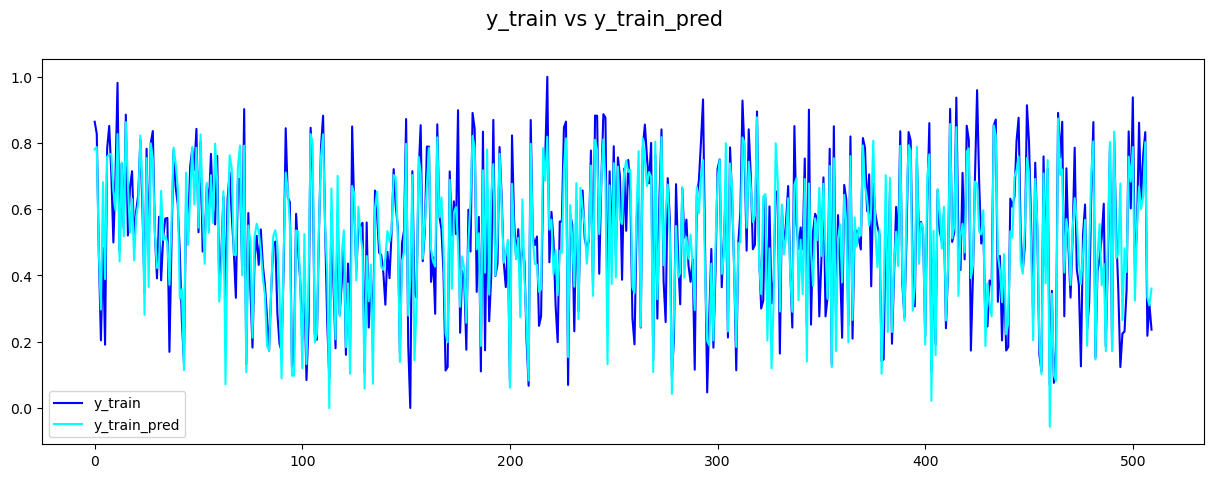

In [1692]:
# y_train vs y_train_predicted
plt.figure(figsize=(15, 5))
c = [i for i in range(0, len(X_train_sm), 1)]
plt.plot(c, y_train, color = "blue")
plt.plot(c, y_train_pred, color = "cyan")
plt.suptitle('y_train vs y_train_pred', fontsize = 15)
plt.legend(['y_train','y_train_pred'])
plt.show()

## Step 6: Residual Analysis of the train data

Check if the error terms are also normally distributed (plot the histogram of the error terms)

In [1693]:
y_train_pred = lr_final_model.predict(X_train_sm)
residual = y_train - y_train_pred
residual

653    0.083462
576    0.039921
426   -0.005563
728   -0.093121
482   -0.198553
         ...   
526    0.124316
578    0.030162
53    -0.115385
350    0.002016
79    -0.124096
Length: 510, dtype: float64

Text(0.5, 0, 'Errors')

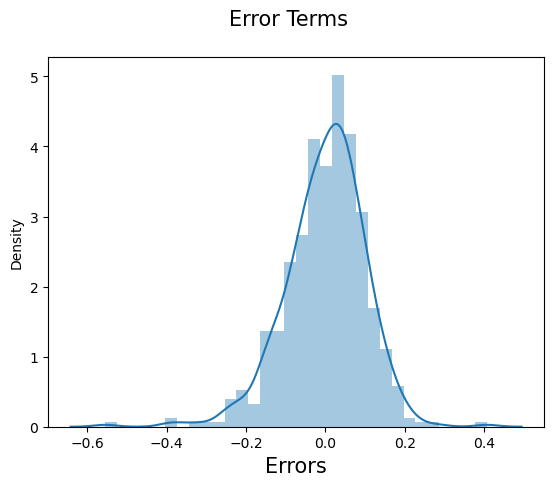

In [1694]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(residual)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('Errors', fontsize = 15)                         # X-label

#### Comment:
Error terms are `Normally distributed`

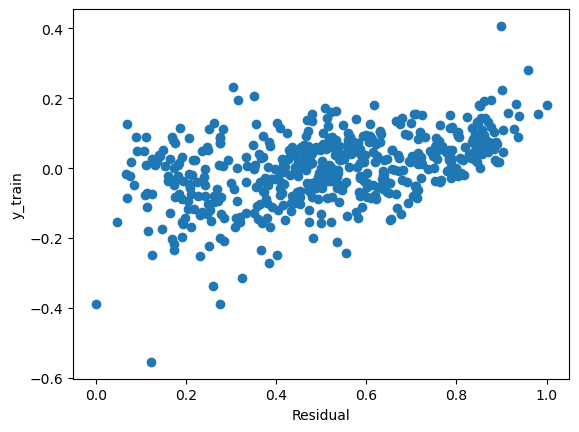

In [1695]:
# Scatterplot
fig = plt.figure()
plt.scatter(y_train, residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

#### Comment:
There is a `Linear relationship` between the selected features

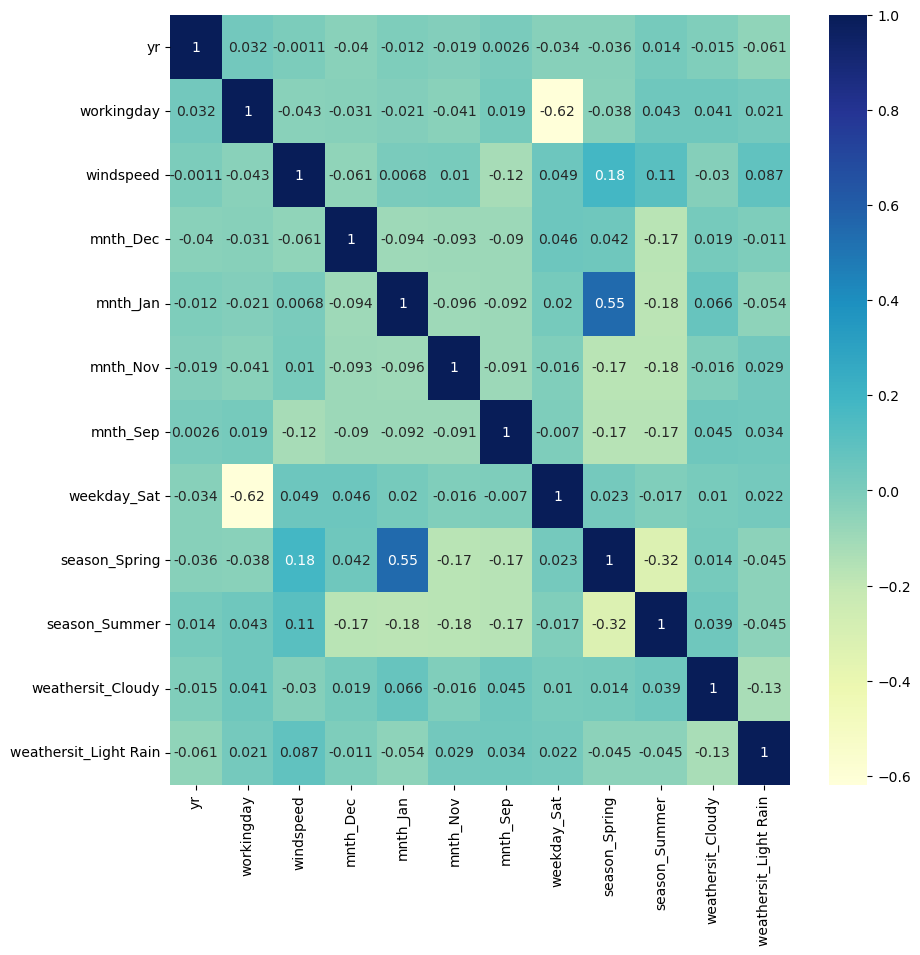

In [1696]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train14_features.corr(), annot = True, cmap = "YlGnBu")
plt.show()

#### Comment:
All the selected features are independent and we can see the absence of `multi-collinearity`

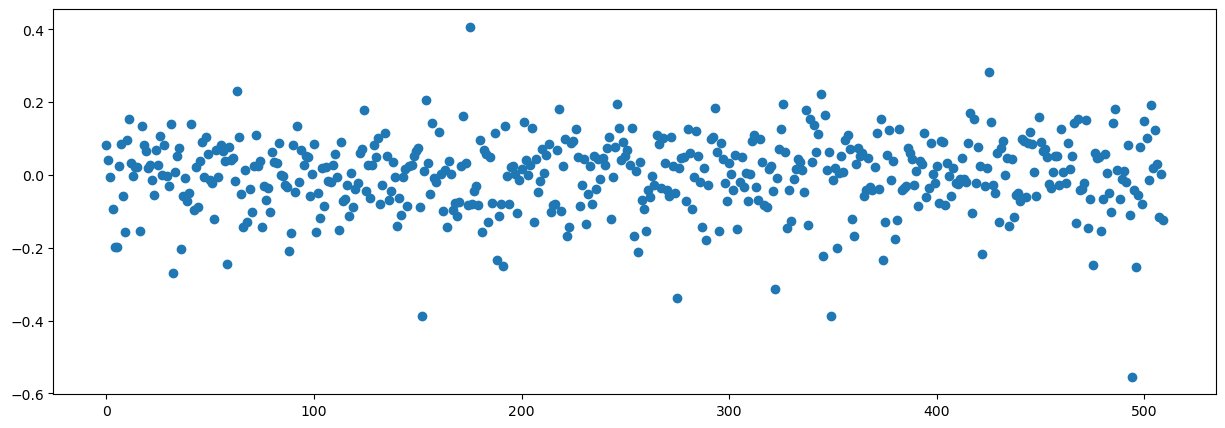

In [1697]:
# Plot error terms for train data
plt.figure(figsize=(15, 5))
c = [i for i in range(0, 510, 1)]
plt.plot(c, residual, marker = 'o', linestyle = "")
plt.show()

#### Comment:
All the error terms are _randomly distributed_ and no pattern can be seen/established - `Homoscedastic` in nature 

## Step 7: Making Predictions Using the Final Model

In [1698]:
# Apply scaler() to numeric fields
test_num_var = ['temp', 'hum', 'windspeed', 'cnt']
df_test[test_num_var] = scaler.transform(df_test[test_num_var])
df_test.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  \
184   0        1           0  0.831783  0.657364   0.084219  0.692706   
535   1        0           1  0.901354  0.610133   0.153728  0.712034   
299   0        0           1  0.511964  0.837699   0.334206  0.303382   
221   0        0           1  0.881625  0.437098   0.339570  0.547400   
152   0        0           1  0.817246  0.314298   0.537414  0.569029   

     mnth_Aug  mnth_Dec  mnth_Feb  ...  weekday_Sat  weekday_Sun  weekday_Thu  \
184         0         0         0  ...            0            0            0   
535         0         0         0  ...            0            0            0   
299         0         0         0  ...            0            0            1   
221         1         0         0  ...            0            0            0   
152         0         0         0  ...            0            0            1   

     weekday_Tue  weekday_Wed  season_Spring  season_Summer  season_Winter  \
184            0            0              0              0              0   
535            0            1              0              1              0   
299            0            0              0              0              1   
221            0            1              0              0              0   
152            0            0              0              1              0   

     weathersit_Cloudy  weathersit_Light Rain  
184                  1                      0  
535                  0                      0  
299                  1                      0  
221                  0                      0  
152                  0                      0  

[5 rows x 29 columns]

In [1699]:
# Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [1700]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     219 non-null    int64  
 1   holiday                219 non-null    int64  
 2   workingday             219 non-null    int64  
 3   temp                   219 non-null    float64
 4   hum                    219 non-null    float64
 5   windspeed              219 non-null    float64
 6   mnth_Aug               219 non-null    uint8  
 7   mnth_Dec               219 non-null    uint8  
 8   mnth_Feb               219 non-null    uint8  
 9   mnth_Jan               219 non-null    uint8  
 10  mnth_Jul               219 non-null    uint8  
 11  mnth_Jun               219 non-null    uint8  
 12  mnth_Mar               219 non-null    uint8  
 13  mnth_May               219 non-null    uint8  
 14  mnth_Nov               219 non-null    uint8  
 15  mnth_

In [1701]:
# Model Predictions
X_test1 = X_test[X_train_final_features.columns]

# Adding a constant variable 
X_test1 = sm.add_constant(X_test1)

In [1702]:
# Making Predictions
y_pred = lr_final_model.predict(X_test1)

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values

Text(0, 0.5, 'y_pred')

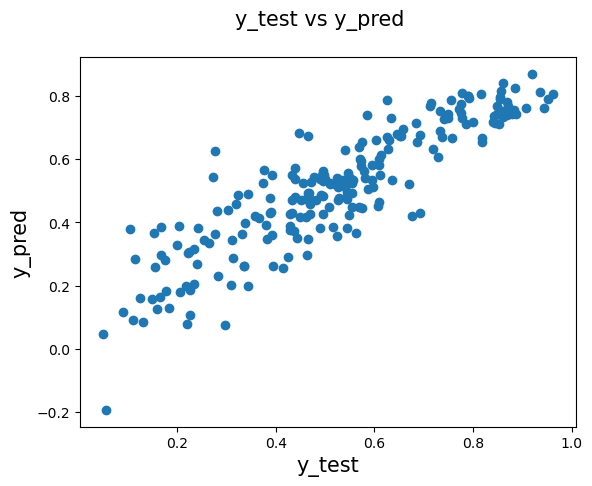

In [1703]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)         # Plot heading 
plt.xlabel('y_test', fontsize = 15)                     # X-label
plt.ylabel('y_pred', fontsize = 15)                     # y-label

#### Comment:
y_test and y_pred has a linear relationship and overall we have a decent model

### Checking the R-Squared Value

In [1704]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7832504527952755

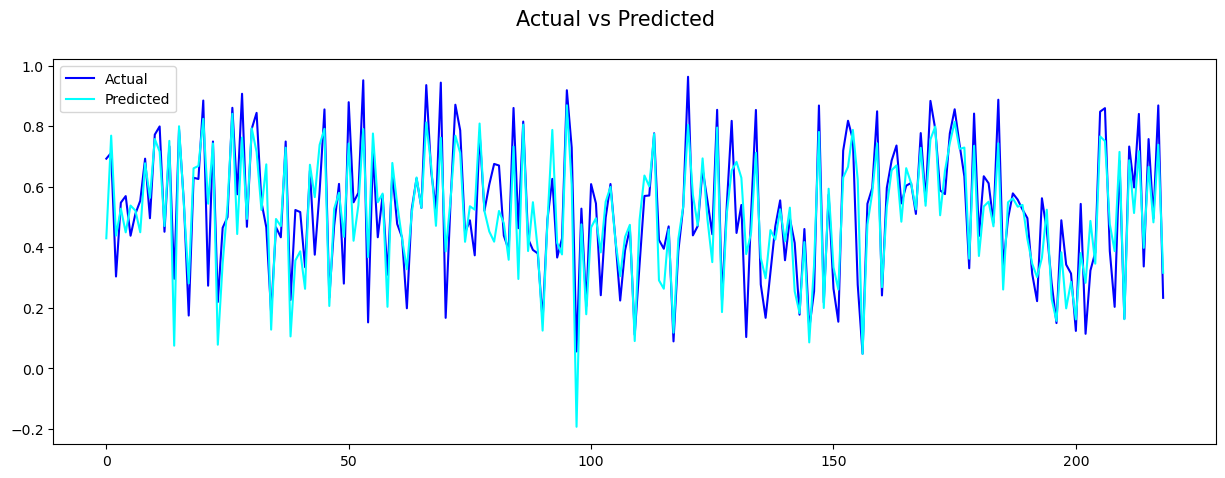

In [1705]:
# Actual vs Predicted
plt.figure(figsize=(15, 5))
c = [i for i in range(0, len(X_test1), 1)]
plt.plot(c, y_test, color = "blue")
plt.plot(c, y_test_pred, color = "cyan")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.legend(['Actual','Predicted'])
plt.show()

#### Comment:
The model has predicted the values with R-Squared = __~78.5%__ which is very close to the trained R-Sq. value, _~80%_

# Conclusion

> Important features selected after following __RFE technique__:<br>
1 Year<br>
2 Working Day<br>
3 Wind Speed<br>
4 Months: January, September, November & December<br>
5 Saturday<br>
6 Seasons: Summer & Spring<br>
7 Weather Situation: Cloudy & Light Rain

> Features that are __positively increasing__ the revenue:<br>
1 Year --> Year-on-Year, there is an increase in usage of this service<br>
2 Working Day<br>
3 Month of September<br>
4 Saturday

> Features that are __negatively influencing__ the revenue:<br>
1 Windspeed<br>
2 Months of January, November & December repectively<br>
3 Season of Spring & Summer<br>
4 Weather Situation being Cloudy to Light Rain

> The best fitting equation of the linear regression model came out to be: <br>
__count = 0.535951 + 0.245744 * year + 0.057024 * workingday - 0.192617 * windspeed - 0.118632 * month_dec - 0.123145 * month_jan - 0.112736 * month_nov + 0.055846 * month_sep + 0.066525 * weekday_sat - 0.238120 * season_spring - 0.040292 * season_summer - 0.090099 * weathersit_cloudy - 0.320724 * weathersit_light_rain__

> Evaluation Results on test data
__R-Squared: ~79__
- The error terms are _normally distributed_
- There is a _linear relationship_ between the selected features
- All the selected features are _independent_
- Error terms are randomly distributed and _homoscedastic_ in nature

